In [1]:
pip install --upgrade tensorflow numpy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     -------------------------- ------------- 41.0/61.1 kB ? eta -:--:--
     -------------------------- ------------- 41.0/61.1 kB ? eta -:--:--
     -------------------------------------- 61.1/61.1 kB 406.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras.utils.np_utils import to_categorical

In [14]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(["Acontecer","Aluno","Amarelo","America","Aproveitar","Bala","Banco","Banheiro","Cinco","Conhecer"])

max_frames_per_video = 75

numeros_videos_por_action = 5
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
sequences, labels = [], []

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(max_frames_per_video):
            file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            
            try:
                res = np.load(file_path)
            except FileNotFoundError:
                array_shape = (678,)
                zeros_array = np.zeros(array_shape)
                window.append(zeros_array)
            else:
                window.append(res)
        
        sequences.append(window)
        labels.append(label_map[action])

        


In [20]:

y = np.array(labels)
X = np.array(sequences)
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1,

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam


In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
actions.shape

(10,)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(75,678)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Defina o caminho onde deseja salvar os pesos do modelo
checkpoint_path = "melhor_peso.h5"

# Crie o callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [32]:
model.compile(optimizer= Adam(0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [33]:
my_model = model.fit(X_train, y_train,batch_size = 128, epochs=6000, callbacks=[tb_callback,checkpoint_callback])

Epoch 1/6000
1/1 [==============================] - 5s 5s/step - loss: 2.3067 - categorical_accuracy: 0.0750
Epoch 2/6000
1/1 [==============================] - 0s 140ms/step - loss: 2.3063 - categorical_accuracy: 0.0750
Epoch 3/6000
1/1 [==============================] - 0s 141ms/step - loss: 2.3059 - categorical_accuracy: 0.0750
Epoch 4/6000
1/1 [==============================] - 0s 140ms/step - loss: 2.3055 - categorical_accuracy: 0.0750
Epoch 5/6000
1/1 [==============================] - 0s 137ms/step - loss: 2.3051 - categorical_accuracy: 0.0750
Epoch 6/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.3047 - categorical_accuracy: 0.0750
Epoch 7/6000
1/1 [==============================] - 0s 133ms/step - loss: 2.3044 - categorical_accuracy: 0.0750
Epoch 8/6000
1/1 [==============================] - 0s 134ms/step - loss: 2.3040 - categorical_accuracy: 0.0750
Epoch 9/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.3037 - categorical_accuracy: 0.

Epoch 30/6000
1/1 [==============================] - 0s 130ms/step - loss: 2.2973 - categorical_accuracy: 0.0750
Epoch 31/6000
1/1 [==============================] - 0s 150ms/step - loss: 2.2971 - categorical_accuracy: 0.0750
Epoch 32/6000
1/1 [==============================] - 0s 150ms/step - loss: 2.2968 - categorical_accuracy: 0.0750
Epoch 33/6000
1/1 [==============================] - 0s 143ms/step - loss: 2.2966 - categorical_accuracy: 0.0750
Epoch 34/6000
1/1 [==============================] - 0s 144ms/step - loss: 2.2963 - categorical_accuracy: 0.0750
Epoch 35/6000
1/1 [==============================] - 0s 141ms/step - loss: 2.2961 - categorical_accuracy: 0.0750
Epoch 36/6000
1/1 [==============================] - 0s 140ms/step - loss: 2.2958 - categorical_accuracy: 0.0750
Epoch 37/6000
1/1 [==============================] - 0s 139ms/step - loss: 2.2956 - categorical_accuracy: 0.0750
Epoch 38/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.2953 - categorical_

Epoch 59/6000
1/1 [==============================] - 0s 149ms/step - loss: 2.2886 - categorical_accuracy: 0.2000
Epoch 60/6000
1/1 [==============================] - 0s 133ms/step - loss: 2.2883 - categorical_accuracy: 0.2000
Epoch 61/6000
1/1 [==============================] - 0s 150ms/step - loss: 2.2879 - categorical_accuracy: 0.2000
Epoch 62/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.2875 - categorical_accuracy: 0.2000
Epoch 63/6000
1/1 [==============================] - 0s 145ms/step - loss: 2.2871 - categorical_accuracy: 0.2000
Epoch 64/6000
1/1 [==============================] - 0s 133ms/step - loss: 2.2866 - categorical_accuracy: 0.2000
Epoch 65/6000
1/1 [==============================] - 0s 136ms/step - loss: 2.2862 - categorical_accuracy: 0.2000
Epoch 66/6000
1/1 [==============================] - 0s 134ms/step - loss: 2.2858 - categorical_accuracy: 0.2000
Epoch 67/6000
1/1 [==============================] - 0s 136ms/step - loss: 2.2853 - categorical_

Epoch 88/6000
1/1 [==============================] - 0s 141ms/step - loss: 2.2731 - categorical_accuracy: 0.2000
Epoch 89/6000
1/1 [==============================] - 0s 131ms/step - loss: 2.2724 - categorical_accuracy: 0.2000
Epoch 90/6000
1/1 [==============================] - 0s 132ms/step - loss: 2.2718 - categorical_accuracy: 0.2000
Epoch 91/6000
1/1 [==============================] - 0s 133ms/step - loss: 2.2711 - categorical_accuracy: 0.2000
Epoch 92/6000
1/1 [==============================] - 0s 134ms/step - loss: 2.2704 - categorical_accuracy: 0.2000
Epoch 93/6000
1/1 [==============================] - 0s 142ms/step - loss: 2.2697 - categorical_accuracy: 0.2000
Epoch 94/6000
1/1 [==============================] - 0s 134ms/step - loss: 2.2690 - categorical_accuracy: 0.2000
Epoch 95/6000
1/1 [==============================] - 0s 132ms/step - loss: 2.2683 - categorical_accuracy: 0.2000
Epoch 96/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.2676 - categorical_

Epoch 117/6000
1/1 [==============================] - 0s 131ms/step - loss: 2.2456 - categorical_accuracy: 0.2000
Epoch 118/6000
1/1 [==============================] - 0s 153ms/step - loss: 2.2442 - categorical_accuracy: 0.2000
Epoch 119/6000
1/1 [==============================] - 0s 167ms/step - loss: 2.2428 - categorical_accuracy: 0.2000
Epoch 120/6000
1/1 [==============================] - 0s 150ms/step - loss: 2.2413 - categorical_accuracy: 0.2000
Epoch 121/6000
1/1 [==============================] - 0s 131ms/step - loss: 2.2398 - categorical_accuracy: 0.2000
Epoch 122/6000
1/1 [==============================] - 0s 135ms/step - loss: 2.2383 - categorical_accuracy: 0.2000
Epoch 123/6000
1/1 [==============================] - 0s 145ms/step - loss: 2.2368 - categorical_accuracy: 0.2000
Epoch 124/6000
1/1 [==============================] - 0s 139ms/step - loss: 2.2352 - categorical_accuracy: 0.2000
Epoch 125/6000
1/1 [==============================] - 0s 133ms/step - loss: 2.2336 - cat

Epoch 146/6000
1/1 [==============================] - 0s 141ms/step - loss: 2.1824 - categorical_accuracy: 0.2000
Epoch 147/6000
1/1 [==============================] - 0s 137ms/step - loss: 2.1786 - categorical_accuracy: 0.2000
Epoch 148/6000
1/1 [==============================] - 0s 147ms/step - loss: 2.1746 - categorical_accuracy: 0.2000
Epoch 149/6000
1/1 [==============================] - 0s 144ms/step - loss: 2.1705 - categorical_accuracy: 0.2000
Epoch 150/6000
1/1 [==============================] - 0s 135ms/step - loss: 2.1661 - categorical_accuracy: 0.2000
Epoch 151/6000
1/1 [==============================] - 0s 137ms/step - loss: 2.1615 - categorical_accuracy: 0.2000
Epoch 152/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.1567 - categorical_accuracy: 0.2000
Epoch 153/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.1517 - categorical_accuracy: 0.2000
Epoch 154/6000
1/1 [==============================] - 0s 147ms/step - loss: 2.1467 - cat

Epoch 175/6000
1/1 [==============================] - 0s 137ms/step - loss: 1.9820 - categorical_accuracy: 0.2000
Epoch 176/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.9607 - categorical_accuracy: 0.2000
Epoch 177/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.9564 - categorical_accuracy: 0.2000
Epoch 178/6000
1/1 [==============================] - 0s 133ms/step - loss: 1.9423 - categorical_accuracy: 0.2000
Epoch 179/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.9377 - categorical_accuracy: 0.2250
Epoch 180/6000
1/1 [==============================] - 0s 134ms/step - loss: 1.9283 - categorical_accuracy: 0.2250
Epoch 181/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.9174 - categorical_accuracy: 0.2250
Epoch 182/6000
1/1 [==============================] - 0s 133ms/step - loss: 1.9088 - categorical_accuracy: 0.2250
Epoch 183/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.8966 - cat

Epoch 204/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.8339 - categorical_accuracy: 0.2000
Epoch 205/6000
1/1 [==============================] - 0s 138ms/step - loss: 1.8250 - categorical_accuracy: 0.2250
Epoch 206/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.8172 - categorical_accuracy: 0.2250
Epoch 207/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.8111 - categorical_accuracy: 0.2250
Epoch 208/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.8090 - categorical_accuracy: 0.2250
Epoch 209/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.8084 - categorical_accuracy: 0.2250
Epoch 210/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.8045 - categorical_accuracy: 0.2250
Epoch 211/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.7975 - categorical_accuracy: 0.2250
Epoch 212/6000
1/1 [==============================] - 0s 145ms/step - loss: 1.7913 - cat

Epoch 233/6000
1/1 [==============================] - 0s 135ms/step - loss: 1.6130 - categorical_accuracy: 0.3000
Epoch 234/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.6037 - categorical_accuracy: 0.3000
Epoch 235/6000
1/1 [==============================] - 0s 136ms/step - loss: 1.5897 - categorical_accuracy: 0.3250
Epoch 236/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.5743 - categorical_accuracy: 0.3250
Epoch 237/6000
1/1 [==============================] - 0s 145ms/step - loss: 1.5616 - categorical_accuracy: 0.3250
Epoch 238/6000
1/1 [==============================] - 0s 135ms/step - loss: 1.5522 - categorical_accuracy: 0.3250
Epoch 239/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.5399 - categorical_accuracy: 0.3250
Epoch 240/6000
1/1 [==============================] - 0s 136ms/step - loss: 1.5274 - categorical_accuracy: 0.3250
Epoch 241/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.5112 - cat

Epoch 262/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.2676 - categorical_accuracy: 0.3500
Epoch 263/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.2623 - categorical_accuracy: 0.3750
Epoch 264/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.2569 - categorical_accuracy: 0.3500
Epoch 265/6000
1/1 [==============================] - 0s 147ms/step - loss: 1.2412 - categorical_accuracy: 0.4000
Epoch 266/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.2222 - categorical_accuracy: 0.3750
Epoch 267/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.2205 - categorical_accuracy: 0.3500
Epoch 268/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.2118 - categorical_accuracy: 0.4000
Epoch 269/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.1898 - categorical_accuracy: 0.4000
Epoch 270/6000
1/1 [==============================] - 0s 147ms/step - loss: 1.1953 - cat

Epoch 291/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.0289 - categorical_accuracy: 0.5750
Epoch 292/6000
1/1 [==============================] - 0s 148ms/step - loss: 1.0309 - categorical_accuracy: 0.6000
Epoch 293/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.0218 - categorical_accuracy: 0.5250
Epoch 294/6000
1/1 [==============================] - 0s 136ms/step - loss: 1.0047 - categorical_accuracy: 0.5750
Epoch 295/6000
1/1 [==============================] - 0s 145ms/step - loss: 1.0097 - categorical_accuracy: 0.6250
Epoch 296/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.9976 - categorical_accuracy: 0.5250
Epoch 297/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.9823 - categorical_accuracy: 0.6000
Epoch 298/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.9794 - categorical_accuracy: 0.6000
Epoch 299/6000
1/1 [==============================] - 0s 137ms/step - loss: 0.9865 - cat

Epoch 320/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.8412 - categorical_accuracy: 0.6750
Epoch 321/6000
1/1 [==============================] - 0s 133ms/step - loss: 0.8635 - categorical_accuracy: 0.6250
Epoch 322/6000
1/1 [==============================] - 0s 136ms/step - loss: 0.8264 - categorical_accuracy: 0.7000
Epoch 323/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.8521 - categorical_accuracy: 0.7250
Epoch 324/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.8216 - categorical_accuracy: 0.7000
Epoch 325/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.8127 - categorical_accuracy: 0.7000
Epoch 326/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.8227 - categorical_accuracy: 0.7750
Epoch 327/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.8029 - categorical_accuracy: 0.7000
Epoch 328/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.7972 - cat

Epoch 349/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.6980 - categorical_accuracy: 0.8500
Epoch 350/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.6689 - categorical_accuracy: 0.8500
Epoch 351/6000
1/1 [==============================] - 0s 137ms/step - loss: 0.6909 - categorical_accuracy: 0.7750
Epoch 352/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.6515 - categorical_accuracy: 0.8500
Epoch 353/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.6692 - categorical_accuracy: 0.8500
Epoch 354/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6737 - categorical_accuracy: 0.8250
Epoch 355/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.6637 - categorical_accuracy: 0.8500
Epoch 356/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.6643 - categorical_accuracy: 0.8500
Epoch 357/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.6417 - cat

Epoch 378/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.5212 - categorical_accuracy: 0.8500
Epoch 379/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.5156 - categorical_accuracy: 0.8500
Epoch 380/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.5058 - categorical_accuracy: 0.8500
Epoch 381/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.5117 - categorical_accuracy: 0.8500
Epoch 382/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.4890 - categorical_accuracy: 0.8500
Epoch 383/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4917 - categorical_accuracy: 0.8500
Epoch 384/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.4888 - categorical_accuracy: 0.8500
Epoch 385/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.4731 - categorical_accuracy: 0.8750
Epoch 386/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4814 - cat

Epoch 407/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3569 - categorical_accuracy: 0.9000
Epoch 408/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3754 - categorical_accuracy: 0.9000
Epoch 409/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.5401 - categorical_accuracy: 0.8000
Epoch 410/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.5386 - categorical_accuracy: 0.8000
Epoch 411/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.7803 - categorical_accuracy: 0.8000
Epoch 412/6000
1/1 [==============================] - 0s 139ms/step - loss: 1.0738 - categorical_accuracy: 0.7500
Epoch 413/6000
1/1 [==============================] - 0s 149ms/step - loss: 1.0403 - categorical_accuracy: 0.7000
Epoch 414/6000
1/1 [==============================] - 0s 151ms/step - loss: 1.4099 - categorical_accuracy: 0.7500
Epoch 415/6000
1/1 [==============================] - 0s 139ms/step - loss: 2.2503 - cat

Epoch 436/6000
1/1 [==============================] - 0s 145ms/step - loss: 3.5719 - categorical_accuracy: 0.2000
Epoch 437/6000
1/1 [==============================] - 0s 137ms/step - loss: 3.3537 - categorical_accuracy: 0.2500
Epoch 438/6000
1/1 [==============================] - 0s 138ms/step - loss: 2.8862 - categorical_accuracy: 0.2500
Epoch 439/6000
1/1 [==============================] - 0s 139ms/step - loss: 2.4319 - categorical_accuracy: 0.3000
Epoch 440/6000
1/1 [==============================] - 0s 139ms/step - loss: 2.1141 - categorical_accuracy: 0.3500
Epoch 441/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.9854 - categorical_accuracy: 0.3750
Epoch 442/6000
1/1 [==============================] - 0s 142ms/step - loss: 2.0422 - categorical_accuracy: 0.3250
Epoch 443/6000
1/1 [==============================] - 0s 141ms/step - loss: 2.0479 - categorical_accuracy: 0.3750
Epoch 444/6000
1/1 [==============================] - 0s 148ms/step - loss: 2.0823 - cat

Epoch 465/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.5829 - categorical_accuracy: 0.4000
Epoch 466/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.5706 - categorical_accuracy: 0.4000
Epoch 467/6000
1/1 [==============================] - 0s 138ms/step - loss: 1.5579 - categorical_accuracy: 0.4000
Epoch 468/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.5453 - categorical_accuracy: 0.4000
Epoch 469/6000
1/1 [==============================] - 0s 148ms/step - loss: 1.5325 - categorical_accuracy: 0.4000
Epoch 470/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.5191 - categorical_accuracy: 0.4000
Epoch 471/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.5054 - categorical_accuracy: 0.4000
Epoch 472/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.4911 - categorical_accuracy: 0.4000
Epoch 473/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.4765 - cat

Epoch 494/6000
1/1 [==============================] - 0s 158ms/step - loss: 1.2010 - categorical_accuracy: 0.5250
Epoch 495/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.1910 - categorical_accuracy: 0.5500
Epoch 496/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.1808 - categorical_accuracy: 0.5750
Epoch 497/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.1704 - categorical_accuracy: 0.5750
Epoch 498/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.1600 - categorical_accuracy: 0.5750
Epoch 499/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.1497 - categorical_accuracy: 0.5750
Epoch 500/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.1393 - categorical_accuracy: 0.5500
Epoch 501/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.1290 - categorical_accuracy: 0.5500
Epoch 502/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.1185 - cat

Epoch 523/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.9669 - categorical_accuracy: 0.6500
Epoch 524/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.9621 - categorical_accuracy: 0.6500
Epoch 525/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.9574 - categorical_accuracy: 0.6500
Epoch 526/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.9527 - categorical_accuracy: 0.6500
Epoch 527/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.9481 - categorical_accuracy: 0.6500
Epoch 528/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.9436 - categorical_accuracy: 0.6500
Epoch 529/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.9391 - categorical_accuracy: 0.6500
Epoch 530/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.9348 - categorical_accuracy: 0.6500
Epoch 531/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.9306 - cat

Epoch 552/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.8510 - categorical_accuracy: 0.6750
Epoch 553/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.8478 - categorical_accuracy: 0.6750
Epoch 554/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.8448 - categorical_accuracy: 0.6750
Epoch 555/6000
1/1 [==============================] - 0s 135ms/step - loss: 0.8416 - categorical_accuracy: 0.6750
Epoch 556/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.8382 - categorical_accuracy: 0.6750
Epoch 557/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.8348 - categorical_accuracy: 0.6750
Epoch 558/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.8313 - categorical_accuracy: 0.6750
Epoch 559/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.8280 - categorical_accuracy: 0.6750
Epoch 560/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.8247 - cat

Epoch 581/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.7586 - categorical_accuracy: 0.7250
Epoch 582/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.7554 - categorical_accuracy: 0.7250
Epoch 583/6000
1/1 [==============================] - 0s 136ms/step - loss: 0.7521 - categorical_accuracy: 0.7250
Epoch 584/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.7488 - categorical_accuracy: 0.7250
Epoch 585/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.7456 - categorical_accuracy: 0.7250
Epoch 586/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.7422 - categorical_accuracy: 0.7250
Epoch 587/6000
1/1 [==============================] - 0s 136ms/step - loss: 0.7387 - categorical_accuracy: 0.7250
Epoch 588/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.7350 - categorical_accuracy: 0.7500
Epoch 589/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.7312 - cat

Epoch 610/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.6601 - categorical_accuracy: 0.8000
Epoch 611/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.6573 - categorical_accuracy: 0.8000
Epoch 612/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.6545 - categorical_accuracy: 0.8000
Epoch 613/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6516 - categorical_accuracy: 0.8000
Epoch 614/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.6491 - categorical_accuracy: 0.8000
Epoch 615/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.6466 - categorical_accuracy: 0.8000
Epoch 616/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.6440 - categorical_accuracy: 0.8000
Epoch 617/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.6414 - categorical_accuracy: 0.8000
Epoch 618/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.6390 - cat

Epoch 639/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.5901 - categorical_accuracy: 0.8500
Epoch 640/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.5879 - categorical_accuracy: 0.8500
Epoch 641/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.5858 - categorical_accuracy: 0.8500
Epoch 642/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.5837 - categorical_accuracy: 0.8500
Epoch 643/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5815 - categorical_accuracy: 0.8500
Epoch 644/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.5793 - categorical_accuracy: 0.8750
Epoch 645/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5772 - categorical_accuracy: 0.8750
Epoch 646/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5750 - categorical_accuracy: 0.8750
Epoch 647/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.5728 - cat

Epoch 668/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.5297 - categorical_accuracy: 0.9000
Epoch 669/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.5278 - categorical_accuracy: 0.9000
Epoch 670/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.5258 - categorical_accuracy: 0.9000
Epoch 671/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.5239 - categorical_accuracy: 0.9000
Epoch 672/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.5220 - categorical_accuracy: 0.9000
Epoch 673/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.5200 - categorical_accuracy: 0.9000
Epoch 674/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5180 - categorical_accuracy: 0.9000
Epoch 675/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.5160 - categorical_accuracy: 0.9000
Epoch 676/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.5141 - cat

Epoch 697/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.4754 - categorical_accuracy: 0.9000
Epoch 698/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.4736 - categorical_accuracy: 0.9000
Epoch 699/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.4716 - categorical_accuracy: 0.9000
Epoch 700/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4696 - categorical_accuracy: 0.9000
Epoch 701/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4677 - categorical_accuracy: 0.9000
Epoch 702/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4657 - categorical_accuracy: 0.9000
Epoch 703/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4635 - categorical_accuracy: 0.9000
Epoch 704/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.4613 - categorical_accuracy: 0.9000
Epoch 705/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4595 - cat

Epoch 726/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.4200 - categorical_accuracy: 0.9000
Epoch 727/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.4184 - categorical_accuracy: 0.9000
Epoch 728/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.4168 - categorical_accuracy: 0.9000
Epoch 729/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4152 - categorical_accuracy: 0.9000
Epoch 730/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.4136 - categorical_accuracy: 0.9000
Epoch 731/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.4119 - categorical_accuracy: 0.9000
Epoch 732/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.4103 - categorical_accuracy: 0.9000
Epoch 733/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.4086 - categorical_accuracy: 0.9000
Epoch 734/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4069 - cat

Epoch 755/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3717 - categorical_accuracy: 0.9500
Epoch 756/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.3702 - categorical_accuracy: 0.9500
Epoch 757/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3687 - categorical_accuracy: 0.9500
Epoch 758/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3669 - categorical_accuracy: 0.9500
Epoch 759/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.3652 - categorical_accuracy: 0.9500
Epoch 760/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3637 - categorical_accuracy: 0.9500
Epoch 761/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3620 - categorical_accuracy: 0.9500
Epoch 762/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3603 - categorical_accuracy: 0.9500
Epoch 763/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3588 - cat

Epoch 784/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3263 - categorical_accuracy: 0.9500
Epoch 785/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3250 - categorical_accuracy: 0.9500
Epoch 786/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.3235 - categorical_accuracy: 0.9500
Epoch 787/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3222 - categorical_accuracy: 0.9500
Epoch 788/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3208 - categorical_accuracy: 0.9500
Epoch 789/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.3195 - categorical_accuracy: 0.9500
Epoch 790/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.3182 - categorical_accuracy: 0.9500
Epoch 791/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3169 - categorical_accuracy: 0.9500
Epoch 792/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.3156 - cat

Epoch 813/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.2914 - categorical_accuracy: 0.9500
Epoch 814/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2902 - categorical_accuracy: 0.9500
Epoch 815/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.2892 - categorical_accuracy: 0.9500
Epoch 816/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2881 - categorical_accuracy: 0.9500
Epoch 817/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2870 - categorical_accuracy: 0.9500
Epoch 818/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.2861 - categorical_accuracy: 0.9500
Epoch 819/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2849 - categorical_accuracy: 0.9500
Epoch 820/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2838 - categorical_accuracy: 0.9500
Epoch 821/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2828 - cat

Epoch 842/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2621 - categorical_accuracy: 0.9500
Epoch 843/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2612 - categorical_accuracy: 0.9500
Epoch 844/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2603 - categorical_accuracy: 0.9500
Epoch 845/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2595 - categorical_accuracy: 0.9500
Epoch 846/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2585 - categorical_accuracy: 0.9500
Epoch 847/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.2578 - categorical_accuracy: 0.9500
Epoch 848/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.2570 - categorical_accuracy: 0.9500
Epoch 849/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2559 - categorical_accuracy: 0.9500
Epoch 850/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2550 - cat

Epoch 871/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2384 - categorical_accuracy: 0.9750
Epoch 872/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2377 - categorical_accuracy: 0.9750
Epoch 873/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2369 - categorical_accuracy: 0.9750
Epoch 874/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.2361 - categorical_accuracy: 0.9750
Epoch 875/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.2354 - categorical_accuracy: 0.9750
Epoch 876/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2346 - categorical_accuracy: 0.9750
Epoch 877/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2339 - categorical_accuracy: 0.9750
Epoch 878/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2332 - categorical_accuracy: 0.9750
Epoch 879/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.2324 - cat

Epoch 900/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2178 - categorical_accuracy: 0.9750
Epoch 901/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.2171 - categorical_accuracy: 0.9750
Epoch 902/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.2164 - categorical_accuracy: 0.9750
Epoch 903/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.2157 - categorical_accuracy: 0.9750
Epoch 904/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.2150 - categorical_accuracy: 0.9750
Epoch 905/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.2143 - categorical_accuracy: 0.9750
Epoch 906/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2137 - categorical_accuracy: 0.9750
Epoch 907/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.2130 - categorical_accuracy: 0.9750
Epoch 908/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2123 - cat

Epoch 929/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1985 - categorical_accuracy: 0.9750
Epoch 930/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1979 - categorical_accuracy: 0.9750
Epoch 931/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.1972 - categorical_accuracy: 0.9750
Epoch 932/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1966 - categorical_accuracy: 0.9750
Epoch 933/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.1959 - categorical_accuracy: 0.9750
Epoch 934/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.1952 - categorical_accuracy: 0.9750
Epoch 935/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1946 - categorical_accuracy: 0.9750
Epoch 936/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.1939 - categorical_accuracy: 0.9750
Epoch 937/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1934 - cat

Epoch 958/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1814 - categorical_accuracy: 0.9750
Epoch 959/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1808 - categorical_accuracy: 0.9750
Epoch 960/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1804 - categorical_accuracy: 0.9750
Epoch 961/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1798 - categorical_accuracy: 0.9750
Epoch 962/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1793 - categorical_accuracy: 0.9750
Epoch 963/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1789 - categorical_accuracy: 0.9750
Epoch 964/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1783 - categorical_accuracy: 0.9750
Epoch 965/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1777 - categorical_accuracy: 0.9750
Epoch 966/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1773 - cat

Epoch 987/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1670 - categorical_accuracy: 1.0000
Epoch 988/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1665 - categorical_accuracy: 1.0000
Epoch 989/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1661 - categorical_accuracy: 1.0000
Epoch 990/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1657 - categorical_accuracy: 1.0000
Epoch 991/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1651 - categorical_accuracy: 1.0000
Epoch 992/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1647 - categorical_accuracy: 1.0000
Epoch 993/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1642 - categorical_accuracy: 1.0000
Epoch 994/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1637 - categorical_accuracy: 1.0000
Epoch 995/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.1632 - cat

Epoch 1016/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1537 - categorical_accuracy: 1.0000
Epoch 1017/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.1533 - categorical_accuracy: 1.0000
Epoch 1018/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1528 - categorical_accuracy: 1.0000
Epoch 1019/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1524 - categorical_accuracy: 1.0000
Epoch 1020/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1519 - categorical_accuracy: 1.0000
Epoch 1021/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1515 - categorical_accuracy: 1.0000
Epoch 1022/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1511 - categorical_accuracy: 1.0000
Epoch 1023/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1507 - categorical_accuracy: 1.0000
Epoch 1024/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.1

1/1 [==============================] - 0s 149ms/step - loss: 0.1421 - categorical_accuracy: 1.0000
Epoch 1045/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1416 - categorical_accuracy: 1.0000
Epoch 1046/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1413 - categorical_accuracy: 1.0000
Epoch 1047/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.1409 - categorical_accuracy: 1.0000
Epoch 1048/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1404 - categorical_accuracy: 1.0000
Epoch 1049/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1401 - categorical_accuracy: 1.0000
Epoch 1050/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1397 - categorical_accuracy: 1.0000
Epoch 1051/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1393 - categorical_accuracy: 1.0000
Epoch 1052/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1390 - categorica

1/1 [==============================] - 0s 146ms/step - loss: 0.1312 - categorical_accuracy: 1.0000
Epoch 1074/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1309 - categorical_accuracy: 1.0000
Epoch 1075/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1305 - categorical_accuracy: 1.0000
Epoch 1076/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1302 - categorical_accuracy: 1.0000
Epoch 1077/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1298 - categorical_accuracy: 1.0000
Epoch 1078/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.1295 - categorical_accuracy: 1.0000
Epoch 1079/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.1291 - categorical_accuracy: 1.0000
Epoch 1080/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.1288 - categorical_accuracy: 1.0000
Epoch 1081/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1283 - categorica

Epoch 1102/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1208 - categorical_accuracy: 1.0000
Epoch 1103/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1204 - categorical_accuracy: 1.0000
Epoch 1104/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.1201 - categorical_accuracy: 1.0000
Epoch 1105/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1198 - categorical_accuracy: 1.0000
Epoch 1106/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1194 - categorical_accuracy: 1.0000
Epoch 1107/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1190 - categorical_accuracy: 1.0000
Epoch 1108/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.1187 - categorical_accuracy: 1.0000
Epoch 1109/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1183 - categorical_accuracy: 1.0000
Epoch 1110/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1

1/1 [==============================] - 0s 144ms/step - loss: 0.1111 - categorical_accuracy: 1.0000
Epoch 1131/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.1108 - categorical_accuracy: 1.0000
Epoch 1132/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.1105 - categorical_accuracy: 1.0000
Epoch 1133/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.1101 - categorical_accuracy: 1.0000
Epoch 1134/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.1098 - categorical_accuracy: 1.0000
Epoch 1135/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1095 - categorical_accuracy: 1.0000
Epoch 1136/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1091 - categorical_accuracy: 1.0000
Epoch 1137/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1088 - categorical_accuracy: 1.0000
Epoch 1138/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1085 - categorica

1/1 [==============================] - 0s 153ms/step - loss: 0.1018 - categorical_accuracy: 1.0000
Epoch 1160/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1015 - categorical_accuracy: 1.0000
Epoch 1161/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1011 - categorical_accuracy: 1.0000
Epoch 1162/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1009 - categorical_accuracy: 1.0000
Epoch 1163/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1006 - categorical_accuracy: 1.0000
Epoch 1164/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1001 - categorical_accuracy: 1.0000
Epoch 1165/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0999 - categorical_accuracy: 1.0000
Epoch 1166/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0995 - categorical_accuracy: 1.0000
Epoch 1167/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0993 - categorica

Epoch 1188/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0929 - categorical_accuracy: 1.0000
Epoch 1189/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0927 - categorical_accuracy: 1.0000
Epoch 1190/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0924 - categorical_accuracy: 1.0000
Epoch 1191/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.0920 - categorical_accuracy: 1.0000
Epoch 1192/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0917 - categorical_accuracy: 1.0000
Epoch 1193/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0914 - categorical_accuracy: 1.0000
Epoch 1194/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.0912 - categorical_accuracy: 1.0000
Epoch 1195/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.0909 - categorical_accuracy: 1.0000
Epoch 1196/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.0

1/1 [==============================] - 0s 140ms/step - loss: 0.0846 - categorical_accuracy: 1.0000
Epoch 1217/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.0843 - categorical_accuracy: 1.0000
Epoch 1218/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.0841 - categorical_accuracy: 1.0000
Epoch 1219/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0837 - categorical_accuracy: 1.0000
Epoch 1220/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0834 - categorical_accuracy: 1.0000
Epoch 1221/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0832 - categorical_accuracy: 1.0000
Epoch 1222/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0828 - categorical_accuracy: 1.0000
Epoch 1223/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0826 - categorical_accuracy: 1.0000
Epoch 1224/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0822 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 0.0758 - categorical_accuracy: 1.0000
Epoch 1246/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0755 - categorical_accuracy: 1.0000
Epoch 1247/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0753 - categorical_accuracy: 1.0000
Epoch 1248/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0749 - categorical_accuracy: 1.0000
Epoch 1249/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0747 - categorical_accuracy: 1.0000
Epoch 1250/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0743 - categorical_accuracy: 1.0000
Epoch 1251/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0741 - categorical_accuracy: 1.0000
Epoch 1252/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0737 - categorical_accuracy: 1.0000
Epoch 1253/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0733 - categorica

Epoch 1274/6000
1/1 [==============================] - 0s 147ms/step - loss: 1.3899 - categorical_accuracy: 0.7500
Epoch 1275/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.2409 - categorical_accuracy: 0.6500
Epoch 1276/6000
1/1 [==============================] - 0s 148ms/step - loss: 1.3040 - categorical_accuracy: 0.6000
Epoch 1277/6000
1/1 [==============================] - 0s 145ms/step - loss: 3.5803 - categorical_accuracy: 0.2750
Epoch 1278/6000
1/1 [==============================] - 0s 148ms/step - loss: 4.5356 - categorical_accuracy: 0.1250
Epoch 1279/6000
1/1 [==============================] - 0s 142ms/step - loss: 3.0037 - categorical_accuracy: 0.3000
Epoch 1280/6000
1/1 [==============================] - 0s 143ms/step - loss: 2.1099 - categorical_accuracy: 0.4250
Epoch 1281/6000
1/1 [==============================] - 0s 155ms/step - loss: 1.7036 - categorical_accuracy: 0.4750
Epoch 1282/6000
1/1 [==============================] - 0s 154ms/step - loss: 1.8

1/1 [==============================] - 0s 145ms/step - loss: 3.2957 - categorical_accuracy: 0.4000
Epoch 1303/6000
1/1 [==============================] - 0s 153ms/step - loss: 3.2652 - categorical_accuracy: 0.4000
Epoch 1304/6000
1/1 [==============================] - 0s 153ms/step - loss: 3.2194 - categorical_accuracy: 0.4000
Epoch 1305/6000
1/1 [==============================] - 0s 144ms/step - loss: 3.0804 - categorical_accuracy: 0.3750
Epoch 1306/6000
1/1 [==============================] - 0s 154ms/step - loss: 2.8692 - categorical_accuracy: 0.3750
Epoch 1307/6000
1/1 [==============================] - 0s 142ms/step - loss: 2.6587 - categorical_accuracy: 0.3750
Epoch 1308/6000
1/1 [==============================] - 0s 147ms/step - loss: 2.5322 - categorical_accuracy: 0.3750
Epoch 1309/6000
1/1 [==============================] - 0s 155ms/step - loss: 2.4466 - categorical_accuracy: 0.3750
Epoch 1310/6000
1/1 [==============================] - 0s 140ms/step - loss: 2.4071 - categorica

1/1 [==============================] - 0s 144ms/step - loss: 1.6457 - categorical_accuracy: 0.5000
Epoch 1332/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.6192 - categorical_accuracy: 0.5000
Epoch 1333/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.5904 - categorical_accuracy: 0.5000
Epoch 1334/6000
1/1 [==============================] - 0s 157ms/step - loss: 1.5627 - categorical_accuracy: 0.5000
Epoch 1335/6000
1/1 [==============================] - 0s 143ms/step - loss: 1.5420 - categorical_accuracy: 0.5000
Epoch 1336/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.5229 - categorical_accuracy: 0.5000
Epoch 1337/6000
1/1 [==============================] - 0s 156ms/step - loss: 1.5061 - categorical_accuracy: 0.5000
Epoch 1338/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.4872 - categorical_accuracy: 0.5000
Epoch 1339/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.4665 - categorica

Epoch 1360/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.1851 - categorical_accuracy: 0.5750
Epoch 1361/6000
1/1 [==============================] - 0s 140ms/step - loss: 1.1769 - categorical_accuracy: 0.6000
Epoch 1362/6000
1/1 [==============================] - 0s 141ms/step - loss: 1.1680 - categorical_accuracy: 0.6000
Epoch 1363/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.1606 - categorical_accuracy: 0.6000
Epoch 1364/6000
1/1 [==============================] - 0s 155ms/step - loss: 1.1539 - categorical_accuracy: 0.6000
Epoch 1365/6000
1/1 [==============================] - 0s 149ms/step - loss: 1.1468 - categorical_accuracy: 0.6000
Epoch 1366/6000
1/1 [==============================] - 0s 145ms/step - loss: 1.1399 - categorical_accuracy: 0.6250
Epoch 1367/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.1331 - categorical_accuracy: 0.6250
Epoch 1368/6000
1/1 [==============================] - 0s 142ms/step - loss: 1.1

1/1 [==============================] - 0s 143ms/step - loss: 0.9528 - categorical_accuracy: 0.6500
Epoch 1389/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.9433 - categorical_accuracy: 0.6750
Epoch 1390/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.9339 - categorical_accuracy: 0.6750
Epoch 1391/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.9248 - categorical_accuracy: 0.6750
Epoch 1392/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.9162 - categorical_accuracy: 0.6750
Epoch 1393/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.9085 - categorical_accuracy: 0.7000
Epoch 1394/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.9008 - categorical_accuracy: 0.7000
Epoch 1395/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.8889 - categorical_accuracy: 0.7000
Epoch 1396/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.8769 - categorica

1/1 [==============================] - 0s 152ms/step - loss: 0.7751 - categorical_accuracy: 0.7500
Epoch 1418/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.7708 - categorical_accuracy: 0.7500
Epoch 1419/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.7676 - categorical_accuracy: 0.7500
Epoch 1420/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.7644 - categorical_accuracy: 0.7500
Epoch 1421/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.7613 - categorical_accuracy: 0.7500
Epoch 1422/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.7580 - categorical_accuracy: 0.7750
Epoch 1423/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.7550 - categorical_accuracy: 0.7750
Epoch 1424/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.7519 - categorical_accuracy: 0.7750
Epoch 1425/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.7490 - categorica

Epoch 1446/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6969 - categorical_accuracy: 0.7750
Epoch 1447/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.6950 - categorical_accuracy: 0.7750
Epoch 1448/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.6929 - categorical_accuracy: 0.7750
Epoch 1449/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.6904 - categorical_accuracy: 0.7750
Epoch 1450/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.6880 - categorical_accuracy: 0.7750
Epoch 1451/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.6857 - categorical_accuracy: 0.7750
Epoch 1452/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.6835 - categorical_accuracy: 0.7750
Epoch 1453/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.6814 - categorical_accuracy: 0.8000
Epoch 1454/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.6

1/1 [==============================] - 0s 146ms/step - loss: 0.6398 - categorical_accuracy: 0.8000
Epoch 1475/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.6379 - categorical_accuracy: 0.8000
Epoch 1476/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.6360 - categorical_accuracy: 0.8000
Epoch 1477/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.6341 - categorical_accuracy: 0.8000
Epoch 1478/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.6321 - categorical_accuracy: 0.8000
Epoch 1479/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.6302 - categorical_accuracy: 0.8000
Epoch 1480/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.6286 - categorical_accuracy: 0.8000
Epoch 1481/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.6268 - categorical_accuracy: 0.8000
Epoch 1482/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6250 - categorica

1/1 [==============================] - 0s 150ms/step - loss: 0.5931 - categorical_accuracy: 0.8000
Epoch 1504/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.5917 - categorical_accuracy: 0.8000
Epoch 1505/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.5905 - categorical_accuracy: 0.8000
Epoch 1506/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5894 - categorical_accuracy: 0.8000
Epoch 1507/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.5881 - categorical_accuracy: 0.8000
Epoch 1508/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.5865 - categorical_accuracy: 0.8000
Epoch 1509/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.5852 - categorical_accuracy: 0.8000
Epoch 1510/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.5839 - categorical_accuracy: 0.8000
Epoch 1511/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.5824 - categorica

Epoch 1532/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.5542 - categorical_accuracy: 0.8000
Epoch 1533/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5528 - categorical_accuracy: 0.8000
Epoch 1534/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.5514 - categorical_accuracy: 0.8000
Epoch 1535/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.5500 - categorical_accuracy: 0.8000
Epoch 1536/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.5487 - categorical_accuracy: 0.8000
Epoch 1537/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.5473 - categorical_accuracy: 0.8000
Epoch 1538/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5459 - categorical_accuracy: 0.8000
Epoch 1539/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.5445 - categorical_accuracy: 0.8000
Epoch 1540/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.5

1/1 [==============================] - 0s 152ms/step - loss: 0.5195 - categorical_accuracy: 0.8250
Epoch 1561/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.5182 - categorical_accuracy: 0.8250
Epoch 1562/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5169 - categorical_accuracy: 0.8250
Epoch 1563/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.5156 - categorical_accuracy: 0.8250
Epoch 1564/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.5150 - categorical_accuracy: 0.8250
Epoch 1565/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.5140 - categorical_accuracy: 0.8250
Epoch 1566/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.5125 - categorical_accuracy: 0.8250
Epoch 1567/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.5115 - categorical_accuracy: 0.8250
Epoch 1568/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.5103 - categorica

1/1 [==============================] - 0s 156ms/step - loss: 0.4890 - categorical_accuracy: 0.8500
Epoch 1590/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.4880 - categorical_accuracy: 0.8500
Epoch 1591/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4870 - categorical_accuracy: 0.8500
Epoch 1592/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4860 - categorical_accuracy: 0.8500
Epoch 1593/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4851 - categorical_accuracy: 0.8500
Epoch 1594/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.4842 - categorical_accuracy: 0.8500
Epoch 1595/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.4831 - categorical_accuracy: 0.8500
Epoch 1596/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.4823 - categorical_accuracy: 0.8500
Epoch 1597/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.4813 - categorica

Epoch 1618/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.4621 - categorical_accuracy: 0.8750
Epoch 1619/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4612 - categorical_accuracy: 0.8750
Epoch 1620/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4604 - categorical_accuracy: 0.8750
Epoch 1621/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4595 - categorical_accuracy: 0.8750
Epoch 1622/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4585 - categorical_accuracy: 0.8750
Epoch 1623/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4578 - categorical_accuracy: 0.8750
Epoch 1624/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4568 - categorical_accuracy: 0.8750
Epoch 1625/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.4560 - categorical_accuracy: 0.8750
Epoch 1626/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4

1/1 [==============================] - 0s 165ms/step - loss: 0.4383 - categorical_accuracy: 0.8750
Epoch 1647/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4376 - categorical_accuracy: 0.8750
Epoch 1648/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.4368 - categorical_accuracy: 0.8750
Epoch 1649/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.4360 - categorical_accuracy: 0.8750
Epoch 1650/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.4351 - categorical_accuracy: 0.8750
Epoch 1651/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4344 - categorical_accuracy: 0.8750
Epoch 1652/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.4334 - categorical_accuracy: 0.8750
Epoch 1653/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.4326 - categorical_accuracy: 0.8750
Epoch 1654/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.4318 - categorica

1/1 [==============================] - 0s 146ms/step - loss: 0.4149 - categorical_accuracy: 0.9000
Epoch 1676/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.4142 - categorical_accuracy: 0.9000
Epoch 1677/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.4135 - categorical_accuracy: 0.9000
Epoch 1678/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.4126 - categorical_accuracy: 0.9000
Epoch 1679/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.4119 - categorical_accuracy: 0.9000
Epoch 1680/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.4111 - categorical_accuracy: 0.9000
Epoch 1681/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4103 - categorical_accuracy: 0.9000
Epoch 1682/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.4096 - categorical_accuracy: 0.9000
Epoch 1683/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.4088 - categorica

Epoch 1704/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.3934 - categorical_accuracy: 0.9250
Epoch 1705/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.3934 - categorical_accuracy: 0.9250
Epoch 1706/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3928 - categorical_accuracy: 0.9250
Epoch 1707/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.3914 - categorical_accuracy: 0.9250
Epoch 1708/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3914 - categorical_accuracy: 0.9250
Epoch 1709/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3907 - categorical_accuracy: 0.9250
Epoch 1710/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.3892 - categorical_accuracy: 0.9250
Epoch 1711/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.3889 - categorical_accuracy: 0.9250
Epoch 1712/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.3

1/1 [==============================] - 0s 161ms/step - loss: 0.3745 - categorical_accuracy: 0.9750
Epoch 1733/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.3735 - categorical_accuracy: 0.9750
Epoch 1734/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3731 - categorical_accuracy: 0.9750
Epoch 1735/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3725 - categorical_accuracy: 0.9750
Epoch 1736/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3716 - categorical_accuracy: 0.9750
Epoch 1737/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3711 - categorical_accuracy: 0.9750
Epoch 1738/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3703 - categorical_accuracy: 0.9750
Epoch 1739/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3696 - categorical_accuracy: 0.9750
Epoch 1740/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.3691 - categorica

1/1 [==============================] - 0s 145ms/step - loss: 0.3549 - categorical_accuracy: 0.9750
Epoch 1762/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.3544 - categorical_accuracy: 0.9750
Epoch 1763/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.3538 - categorical_accuracy: 0.9750
Epoch 1764/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3531 - categorical_accuracy: 0.9750
Epoch 1765/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.3521 - categorical_accuracy: 0.9750
Epoch 1766/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3523 - categorical_accuracy: 0.9750
Epoch 1767/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3515 - categorical_accuracy: 0.9750
Epoch 1768/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3506 - categorical_accuracy: 0.9750
Epoch 1769/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.3501 - categorica

Epoch 1790/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.3371 - categorical_accuracy: 0.9750
Epoch 1791/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.3371 - categorical_accuracy: 0.9750
Epoch 1792/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3357 - categorical_accuracy: 0.9750
Epoch 1793/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.3354 - categorical_accuracy: 0.9750
Epoch 1794/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.3348 - categorical_accuracy: 0.9750
Epoch 1795/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.3339 - categorical_accuracy: 0.9750
Epoch 1796/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3342 - categorical_accuracy: 0.9750
Epoch 1797/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.3331 - categorical_accuracy: 0.9750
Epoch 1798/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3

1/1 [==============================] - 0s 148ms/step - loss: 0.3211 - categorical_accuracy: 0.9750
Epoch 1819/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3210 - categorical_accuracy: 0.9750
Epoch 1820/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.3200 - categorical_accuracy: 0.9750
Epoch 1821/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.3195 - categorical_accuracy: 0.9750
Epoch 1822/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.3189 - categorical_accuracy: 0.9750
Epoch 1823/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.3185 - categorical_accuracy: 0.9750
Epoch 1824/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.3179 - categorical_accuracy: 0.9750
Epoch 1825/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3174 - categorical_accuracy: 0.9750
Epoch 1826/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.3167 - categorica

1/1 [==============================] - 0s 144ms/step - loss: 0.3063 - categorical_accuracy: 0.9750
Epoch 1848/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.3054 - categorical_accuracy: 0.9750
Epoch 1849/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3052 - categorical_accuracy: 0.9750
Epoch 1850/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3044 - categorical_accuracy: 0.9750
Epoch 1851/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.3045 - categorical_accuracy: 0.9750
Epoch 1852/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3037 - categorical_accuracy: 0.9750
Epoch 1853/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3033 - categorical_accuracy: 0.9750
Epoch 1854/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3024 - categorical_accuracy: 0.9750
Epoch 1855/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.3027 - categorica

Epoch 1876/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2923 - categorical_accuracy: 0.9750
Epoch 1877/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.2927 - categorical_accuracy: 0.9750
Epoch 1878/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2917 - categorical_accuracy: 0.9750
Epoch 1879/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.2911 - categorical_accuracy: 0.9750
Epoch 1880/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2913 - categorical_accuracy: 0.9750
Epoch 1881/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.2905 - categorical_accuracy: 0.9750
Epoch 1882/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2893 - categorical_accuracy: 0.9750
Epoch 1883/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2896 - categorical_accuracy: 0.9750
Epoch 1884/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2

1/1 [==============================] - 0s 146ms/step - loss: 0.2798 - categorical_accuracy: 0.9750
Epoch 1905/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.2790 - categorical_accuracy: 0.9750
Epoch 1906/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2790 - categorical_accuracy: 0.9750
Epoch 1907/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2782 - categorical_accuracy: 0.9750
Epoch 1908/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.2778 - categorical_accuracy: 0.9750
Epoch 1909/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.2771 - categorical_accuracy: 0.9750
Epoch 1910/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2767 - categorical_accuracy: 0.9750
Epoch 1911/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.2763 - categorical_accuracy: 0.9750
Epoch 1912/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.2758 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 0.2676 - categorical_accuracy: 0.9750
Epoch 1934/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2680 - categorical_accuracy: 0.9750
Epoch 1935/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.2670 - categorical_accuracy: 0.9750
Epoch 1936/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2666 - categorical_accuracy: 0.9750
Epoch 1937/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.2662 - categorical_accuracy: 0.9750
Epoch 1938/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2657 - categorical_accuracy: 0.9750
Epoch 1939/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.2652 - categorical_accuracy: 0.9750
Epoch 1940/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.2650 - categorical_accuracy: 0.9750
Epoch 1941/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2641 - categorica

Epoch 1962/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2560 - categorical_accuracy: 0.9750
Epoch 1963/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.2555 - categorical_accuracy: 0.9750
Epoch 1964/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2552 - categorical_accuracy: 0.9750
Epoch 1965/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.2549 - categorical_accuracy: 0.9750
Epoch 1966/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2544 - categorical_accuracy: 0.9750
Epoch 1967/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.2545 - categorical_accuracy: 0.9750
Epoch 1968/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2537 - categorical_accuracy: 0.9750
Epoch 1969/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2532 - categorical_accuracy: 0.9750
Epoch 1970/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2

1/1 [==============================] - 0s 149ms/step - loss: 1.7577 - categorical_accuracy: 0.5000
Epoch 1991/6000
1/1 [==============================] - 0s 148ms/step - loss: 1.6378 - categorical_accuracy: 0.5500
Epoch 1992/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.5476 - categorical_accuracy: 0.5750
Epoch 1993/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.4740 - categorical_accuracy: 0.5500
Epoch 1994/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.5328 - categorical_accuracy: 0.6000
Epoch 1995/6000
1/1 [==============================] - 0s 154ms/step - loss: 1.3895 - categorical_accuracy: 0.6250
Epoch 1996/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.3715 - categorical_accuracy: 0.6250
Epoch 1997/6000
1/1 [==============================] - 0s 157ms/step - loss: 1.3687 - categorical_accuracy: 0.6000
Epoch 1998/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.3637 - categorica

1/1 [==============================] - 0s 147ms/step - loss: 1.1823 - categorical_accuracy: 0.6500
Epoch 2020/6000
1/1 [==============================] - 0s 144ms/step - loss: 1.1766 - categorical_accuracy: 0.6250
Epoch 2021/6000
1/1 [==============================] - 0s 151ms/step - loss: 1.1709 - categorical_accuracy: 0.6250
Epoch 2022/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.1647 - categorical_accuracy: 0.6250
Epoch 2023/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.1578 - categorical_accuracy: 0.6250
Epoch 2024/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.1516 - categorical_accuracy: 0.6500
Epoch 2025/6000
1/1 [==============================] - 0s 157ms/step - loss: 1.1452 - categorical_accuracy: 0.6500
Epoch 2026/6000
1/1 [==============================] - 0s 151ms/step - loss: 1.1398 - categorical_accuracy: 0.6500
Epoch 2027/6000
1/1 [==============================] - 0s 161ms/step - loss: 1.1369 - categorica

Epoch 2048/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.0359 - categorical_accuracy: 0.6750
Epoch 2049/6000
1/1 [==============================] - 0s 157ms/step - loss: 1.0316 - categorical_accuracy: 0.6750
Epoch 2050/6000
1/1 [==============================] - 0s 165ms/step - loss: 1.0272 - categorical_accuracy: 0.6750
Epoch 2051/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.0229 - categorical_accuracy: 0.6750
Epoch 2052/6000
1/1 [==============================] - 0s 152ms/step - loss: 1.0186 - categorical_accuracy: 0.6750
Epoch 2053/6000
1/1 [==============================] - 0s 151ms/step - loss: 1.0143 - categorical_accuracy: 0.6750
Epoch 2054/6000
1/1 [==============================] - 0s 156ms/step - loss: 1.0104 - categorical_accuracy: 0.6750
Epoch 2055/6000
1/1 [==============================] - 0s 161ms/step - loss: 1.0065 - categorical_accuracy: 0.6750
Epoch 2056/6000
1/1 [==============================] - 0s 159ms/step - loss: 1.0

1/1 [==============================] - 0s 151ms/step - loss: 0.9242 - categorical_accuracy: 0.7000
Epoch 2077/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.9206 - categorical_accuracy: 0.7000
Epoch 2078/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.9170 - categorical_accuracy: 0.7000
Epoch 2079/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.9135 - categorical_accuracy: 0.7000
Epoch 2080/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.9101 - categorical_accuracy: 0.7000
Epoch 2081/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.9068 - categorical_accuracy: 0.7000
Epoch 2082/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.9038 - categorical_accuracy: 0.7000
Epoch 2083/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.9007 - categorical_accuracy: 0.7000
Epoch 2084/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.8974 - categorica

1/1 [==============================] - 0s 156ms/step - loss: 0.8280 - categorical_accuracy: 0.7500
Epoch 2106/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.8251 - categorical_accuracy: 0.7500
Epoch 2107/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.8220 - categorical_accuracy: 0.7500
Epoch 2108/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.8190 - categorical_accuracy: 0.7500
Epoch 2109/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.8162 - categorical_accuracy: 0.7500
Epoch 2110/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.8131 - categorical_accuracy: 0.7500
Epoch 2111/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.8100 - categorical_accuracy: 0.7500
Epoch 2112/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.8070 - categorical_accuracy: 0.7500
Epoch 2113/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.8039 - categorica

Epoch 2134/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.7354 - categorical_accuracy: 0.7750
Epoch 2135/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.7321 - categorical_accuracy: 0.7750
Epoch 2136/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.7288 - categorical_accuracy: 0.7750
Epoch 2137/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.7254 - categorical_accuracy: 0.7750
Epoch 2138/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.7219 - categorical_accuracy: 0.8000
Epoch 2139/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.7185 - categorical_accuracy: 0.8000
Epoch 2140/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.7150 - categorical_accuracy: 0.8000
Epoch 2141/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.7116 - categorical_accuracy: 0.8000
Epoch 2142/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.7

1/1 [==============================] - 0s 149ms/step - loss: 0.6408 - categorical_accuracy: 0.8250
Epoch 2163/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.6373 - categorical_accuracy: 0.8250
Epoch 2164/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.6338 - categorical_accuracy: 0.8250
Epoch 2165/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.6302 - categorical_accuracy: 0.8500
Epoch 2166/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.6266 - categorical_accuracy: 0.8750
Epoch 2167/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.6230 - categorical_accuracy: 0.8750
Epoch 2168/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.6194 - categorical_accuracy: 0.8750
Epoch 2169/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6157 - categorical_accuracy: 0.8750
Epoch 2170/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.6121 - categorica

1/1 [==============================] - 0s 141ms/step - loss: 0.5392 - categorical_accuracy: 0.8750
Epoch 2192/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.5362 - categorical_accuracy: 0.8750
Epoch 2193/6000
1/1 [==============================] - 0s 175ms/step - loss: 0.5328 - categorical_accuracy: 0.8750
Epoch 2194/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.5298 - categorical_accuracy: 0.8750
Epoch 2195/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.5266 - categorical_accuracy: 0.8750
Epoch 2196/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.5238 - categorical_accuracy: 0.8750
Epoch 2197/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.5204 - categorical_accuracy: 0.8750
Epoch 2198/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.5174 - categorical_accuracy: 0.8750
Epoch 2199/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.5141 - categorica

Epoch 2220/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.4628 - categorical_accuracy: 0.9250
Epoch 2221/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.4532 - categorical_accuracy: 0.9250
Epoch 2222/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.4589 - categorical_accuracy: 0.9250
Epoch 2223/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.4557 - categorical_accuracy: 0.9250
Epoch 2224/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.4531 - categorical_accuracy: 0.9250
Epoch 2225/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.4475 - categorical_accuracy: 0.9250
Epoch 2226/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.4442 - categorical_accuracy: 0.9250
Epoch 2227/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.4417 - categorical_accuracy: 0.9250
Epoch 2228/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.4

1/1 [==============================] - 0s 157ms/step - loss: 0.3905 - categorical_accuracy: 0.9500
Epoch 2249/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3885 - categorical_accuracy: 0.9500
Epoch 2250/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3866 - categorical_accuracy: 0.9500
Epoch 2251/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.3849 - categorical_accuracy: 0.9500
Epoch 2252/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3832 - categorical_accuracy: 0.9500
Epoch 2253/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3813 - categorical_accuracy: 0.9500
Epoch 2254/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3793 - categorical_accuracy: 0.9500
Epoch 2255/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.3772 - categorical_accuracy: 0.9500
Epoch 2256/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3754 - categorica

1/1 [==============================] - 0s 158ms/step - loss: 0.3351 - categorical_accuracy: 0.9500
Epoch 2278/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3340 - categorical_accuracy: 0.9500
Epoch 2279/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.3326 - categorical_accuracy: 0.9500
Epoch 2280/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3302 - categorical_accuracy: 0.9500
Epoch 2281/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3286 - categorical_accuracy: 0.9500
Epoch 2282/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.3268 - categorical_accuracy: 0.9500
Epoch 2283/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3272 - categorical_accuracy: 0.9500
Epoch 2284/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.3254 - categorical_accuracy: 0.9500
Epoch 2285/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.3233 - categorica

Epoch 2306/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2986 - categorical_accuracy: 0.9500
Epoch 2307/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2970 - categorical_accuracy: 0.9500
Epoch 2308/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2965 - categorical_accuracy: 0.9500
Epoch 2309/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2947 - categorical_accuracy: 0.9500
Epoch 2310/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2948 - categorical_accuracy: 0.9500
Epoch 2311/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2928 - categorical_accuracy: 0.9500
Epoch 2312/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.2917 - categorical_accuracy: 0.9500
Epoch 2313/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2909 - categorical_accuracy: 0.9500
Epoch 2314/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2

1/1 [==============================] - 0s 149ms/step - loss: 0.2716 - categorical_accuracy: 0.9750
Epoch 2335/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2702 - categorical_accuracy: 0.9750
Epoch 2336/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2699 - categorical_accuracy: 0.9750
Epoch 2337/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.2683 - categorical_accuracy: 0.9750
Epoch 2338/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.2683 - categorical_accuracy: 0.9750
Epoch 2339/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2663 - categorical_accuracy: 0.9750
Epoch 2340/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.2657 - categorical_accuracy: 0.9750
Epoch 2341/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2646 - categorical_accuracy: 0.9750
Epoch 2342/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2639 - categorica

1/1 [==============================] - 0s 141ms/step - loss: 0.2465 - categorical_accuracy: 0.9750
Epoch 2364/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2458 - categorical_accuracy: 0.9750
Epoch 2365/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2451 - categorical_accuracy: 0.9750
Epoch 2366/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2444 - categorical_accuracy: 0.9750
Epoch 2367/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.2436 - categorical_accuracy: 0.9750
Epoch 2368/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2429 - categorical_accuracy: 0.9750
Epoch 2369/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2422 - categorical_accuracy: 0.9750
Epoch 2370/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2415 - categorical_accuracy: 0.9750
Epoch 2371/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2408 - categorica

Epoch 2392/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2265 - categorical_accuracy: 0.9750
Epoch 2393/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2259 - categorical_accuracy: 0.9750
Epoch 2394/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2257 - categorical_accuracy: 0.9750
Epoch 2395/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.2246 - categorical_accuracy: 0.9750
Epoch 2396/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2243 - categorical_accuracy: 0.9750
Epoch 2397/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2233 - categorical_accuracy: 0.9750
Epoch 2398/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2229 - categorical_accuracy: 0.9750
Epoch 2399/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2221 - categorical_accuracy: 0.9750
Epoch 2400/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2

1/1 [==============================] - 0s 157ms/step - loss: 0.2087 - categorical_accuracy: 0.9750
Epoch 2421/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2086 - categorical_accuracy: 0.9750
Epoch 2422/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2075 - categorical_accuracy: 0.9750
Epoch 2423/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2072 - categorical_accuracy: 0.9750
Epoch 2424/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2069 - categorical_accuracy: 0.9750
Epoch 2425/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2057 - categorical_accuracy: 0.9750
Epoch 2426/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2055 - categorical_accuracy: 0.9750
Epoch 2427/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2045 - categorical_accuracy: 0.9750
Epoch 2428/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.2040 - categorica

1/1 [==============================] - 0s 157ms/step - loss: 0.1926 - categorical_accuracy: 0.9750
Epoch 2450/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1921 - categorical_accuracy: 0.9750
Epoch 2451/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1916 - categorical_accuracy: 0.9750
Epoch 2452/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1912 - categorical_accuracy: 0.9750
Epoch 2453/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1908 - categorical_accuracy: 0.9750
Epoch 2454/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.1902 - categorical_accuracy: 0.9750
Epoch 2455/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.1898 - categorical_accuracy: 0.9750
Epoch 2456/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1895 - categorical_accuracy: 0.9750
Epoch 2457/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1890 - categorica

Epoch 2478/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1808 - categorical_accuracy: 0.9750
Epoch 2479/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1804 - categorical_accuracy: 0.9750
Epoch 2480/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.1801 - categorical_accuracy: 0.9750
Epoch 2481/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1797 - categorical_accuracy: 0.9750
Epoch 2482/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1792 - categorical_accuracy: 0.9750
Epoch 2483/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1790 - categorical_accuracy: 0.9750
Epoch 2484/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1786 - categorical_accuracy: 0.9750
Epoch 2485/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1784 - categorical_accuracy: 0.9750
Epoch 2486/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1

1/1 [==============================] - 0s 157ms/step - loss: 0.1716 - categorical_accuracy: 0.9750
Epoch 2507/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1714 - categorical_accuracy: 0.9750
Epoch 2508/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1709 - categorical_accuracy: 0.9750
Epoch 2509/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1708 - categorical_accuracy: 0.9750
Epoch 2510/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1703 - categorical_accuracy: 0.9750
Epoch 2511/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1701 - categorical_accuracy: 0.9750
Epoch 2512/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1696 - categorical_accuracy: 0.9750
Epoch 2513/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1696 - categorical_accuracy: 0.9750
Epoch 2514/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1692 - categorica

1/1 [==============================] - 0s 141ms/step - loss: 0.1625 - categorical_accuracy: 0.9750
Epoch 2536/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1622 - categorical_accuracy: 0.9750
Epoch 2537/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1618 - categorical_accuracy: 0.9750
Epoch 2538/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1615 - categorical_accuracy: 0.9750
Epoch 2539/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1611 - categorical_accuracy: 0.9750
Epoch 2540/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1607 - categorical_accuracy: 0.9750
Epoch 2541/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1604 - categorical_accuracy: 0.9750
Epoch 2542/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1600 - categorical_accuracy: 0.9750
Epoch 2543/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1598 - categorica

Epoch 2564/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1534 - categorical_accuracy: 0.9750
Epoch 2565/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.1531 - categorical_accuracy: 0.9750
Epoch 2566/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1529 - categorical_accuracy: 0.9750
Epoch 2567/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1526 - categorical_accuracy: 0.9750
Epoch 2568/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1523 - categorical_accuracy: 0.9750
Epoch 2569/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1520 - categorical_accuracy: 0.9750
Epoch 2570/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1518 - categorical_accuracy: 0.9750
Epoch 2571/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1515 - categorical_accuracy: 0.9750
Epoch 2572/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1

1/1 [==============================] - 0s 157ms/step - loss: 0.1462 - categorical_accuracy: 0.9750
Epoch 2593/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1460 - categorical_accuracy: 0.9750
Epoch 2594/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1457 - categorical_accuracy: 0.9750
Epoch 2595/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.1455 - categorical_accuracy: 0.9750
Epoch 2596/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1452 - categorical_accuracy: 0.9750
Epoch 2597/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1450 - categorical_accuracy: 0.9750
Epoch 2598/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.1448 - categorical_accuracy: 0.9750
Epoch 2599/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1445 - categorical_accuracy: 0.9750
Epoch 2600/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1443 - categorica

1/1 [==============================] - 0s 141ms/step - loss: 0.1395 - categorical_accuracy: 0.9750
Epoch 2622/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1393 - categorical_accuracy: 0.9750
Epoch 2623/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1391 - categorical_accuracy: 0.9750
Epoch 2624/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1389 - categorical_accuracy: 0.9750
Epoch 2625/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.1386 - categorical_accuracy: 0.9750
Epoch 2626/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.1384 - categorical_accuracy: 0.9750
Epoch 2627/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1382 - categorical_accuracy: 0.9750
Epoch 2628/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1380 - categorical_accuracy: 0.9750
Epoch 2629/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1378 - categorica

Epoch 2650/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1334 - categorical_accuracy: 0.9750
Epoch 2651/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1332 - categorical_accuracy: 0.9750
Epoch 2652/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.1330 - categorical_accuracy: 0.9750
Epoch 2653/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.1327 - categorical_accuracy: 0.9750
Epoch 2654/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1325 - categorical_accuracy: 0.9750
Epoch 2655/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1323 - categorical_accuracy: 0.9750
Epoch 2656/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1321 - categorical_accuracy: 0.9750
Epoch 2657/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1319 - categorical_accuracy: 0.9750
Epoch 2658/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.1

1/1 [==============================] - 0s 173ms/step - loss: 0.1279 - categorical_accuracy: 0.9750
Epoch 2679/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1277 - categorical_accuracy: 0.9750
Epoch 2680/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1275 - categorical_accuracy: 0.9750
Epoch 2681/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1273 - categorical_accuracy: 0.9750
Epoch 2682/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1271 - categorical_accuracy: 0.9750
Epoch 2683/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1269 - categorical_accuracy: 0.9750
Epoch 2684/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1268 - categorical_accuracy: 0.9750
Epoch 2685/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.1266 - categorical_accuracy: 0.9750
Epoch 2686/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1264 - categorica

1/1 [==============================] - 0s 141ms/step - loss: 0.1227 - categorical_accuracy: 0.9750
Epoch 2708/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1225 - categorical_accuracy: 0.9750
Epoch 2709/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1224 - categorical_accuracy: 0.9750
Epoch 2710/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1222 - categorical_accuracy: 0.9750
Epoch 2711/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1221 - categorical_accuracy: 0.9750
Epoch 2712/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1219 - categorical_accuracy: 0.9750
Epoch 2713/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1217 - categorical_accuracy: 0.9750
Epoch 2714/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1215 - categorical_accuracy: 0.9750
Epoch 2715/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1214 - categorica

Epoch 2736/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1180 - categorical_accuracy: 0.9750
Epoch 2737/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1177 - categorical_accuracy: 0.9750
Epoch 2738/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1177 - categorical_accuracy: 0.9750
Epoch 2739/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1175 - categorical_accuracy: 0.9750
Epoch 2740/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1175 - categorical_accuracy: 0.9750
Epoch 2741/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1171 - categorical_accuracy: 0.9750
Epoch 2742/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1171 - categorical_accuracy: 0.9750
Epoch 2743/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1168 - categorical_accuracy: 0.9750
Epoch 2744/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1

1/1 [==============================] - 0s 157ms/step - loss: 0.1135 - categorical_accuracy: 0.9750
Epoch 2765/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1133 - categorical_accuracy: 0.9750
Epoch 2766/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1132 - categorical_accuracy: 0.9750
Epoch 2767/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1131 - categorical_accuracy: 0.9750
Epoch 2768/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1129 - categorical_accuracy: 0.9750
Epoch 2769/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1127 - categorical_accuracy: 0.9750
Epoch 2770/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1127 - categorical_accuracy: 0.9750
Epoch 2771/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1124 - categorical_accuracy: 0.9750
Epoch 2772/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1124 - categorica

1/1 [==============================] - 0s 166ms/step - loss: 0.1089 - categorical_accuracy: 0.9750
Epoch 2794/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1088 - categorical_accuracy: 0.9750
Epoch 2795/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1086 - categorical_accuracy: 0.9750
Epoch 2796/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1084 - categorical_accuracy: 0.9750
Epoch 2797/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1083 - categorical_accuracy: 0.9750
Epoch 2798/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1082 - categorical_accuracy: 0.9750
Epoch 2799/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.1080 - categorical_accuracy: 0.9750
Epoch 2800/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1078 - categorical_accuracy: 0.9750
Epoch 2801/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.1079 - categorica

Epoch 2822/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1044 - categorical_accuracy: 0.9750
Epoch 2823/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1043 - categorical_accuracy: 0.9750
Epoch 2824/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1041 - categorical_accuracy: 0.9750
Epoch 2825/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1039 - categorical_accuracy: 0.9750
Epoch 2826/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1037 - categorical_accuracy: 0.9750
Epoch 2827/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1036 - categorical_accuracy: 0.9750
Epoch 2828/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1034 - categorical_accuracy: 0.9750
Epoch 2829/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1033 - categorical_accuracy: 0.9750
Epoch 2830/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1

1/1 [==============================] - 0s 157ms/step - loss: 0.1005 - categorical_accuracy: 0.9750
Epoch 2851/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1007 - categorical_accuracy: 0.9750
Epoch 2852/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0999 - categorical_accuracy: 0.9750
Epoch 2853/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1014 - categorical_accuracy: 0.9750
Epoch 2854/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.1000 - categorical_accuracy: 0.9750
Epoch 2855/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1012 - categorical_accuracy: 0.9750
Epoch 2856/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0998 - categorical_accuracy: 0.9750
Epoch 2857/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0996 - categorical_accuracy: 0.9750
Epoch 2858/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1003 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 0.0983 - categorical_accuracy: 0.9750
Epoch 2880/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0961 - categorical_accuracy: 0.9750
Epoch 2881/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0956 - categorical_accuracy: 0.9750
Epoch 2882/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0972 - categorical_accuracy: 0.9750
Epoch 2883/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0958 - categorical_accuracy: 0.9750
Epoch 2884/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0979 - categorical_accuracy: 0.9750
Epoch 2885/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0963 - categorical_accuracy: 0.9750
Epoch 2886/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0950 - categorical_accuracy: 0.9750
Epoch 2887/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0982 - categorica

Epoch 2908/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0936 - categorical_accuracy: 0.9750
Epoch 2909/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0918 - categorical_accuracy: 0.9750
Epoch 2910/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0928 - categorical_accuracy: 0.9750
Epoch 2911/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0929 - categorical_accuracy: 0.9750
Epoch 2912/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0917 - categorical_accuracy: 0.9750
Epoch 2913/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0913 - categorical_accuracy: 0.9750
Epoch 2914/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0918 - categorical_accuracy: 0.9750
Epoch 2915/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0911 - categorical_accuracy: 0.9750
Epoch 2916/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0

1/1 [==============================] - 0s 157ms/step - loss: 0.0882 - categorical_accuracy: 0.9750
Epoch 2937/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0880 - categorical_accuracy: 0.9750
Epoch 2938/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0881 - categorical_accuracy: 0.9750
Epoch 2939/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0878 - categorical_accuracy: 0.9750
Epoch 2940/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0877 - categorical_accuracy: 0.9750
Epoch 2941/6000
1/1 [==============================] - 0s 175ms/step - loss: 0.0876 - categorical_accuracy: 0.9750
Epoch 2942/6000
1/1 [==============================] - 0s 138ms/step - loss: 0.0875 - categorical_accuracy: 0.9750
Epoch 2943/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0873 - categorical_accuracy: 0.9750
Epoch 2944/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0873 - categorica

1/1 [==============================] - 0s 157ms/step - loss: 0.0849 - categorical_accuracy: 0.9750
Epoch 2966/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0848 - categorical_accuracy: 0.9750
Epoch 2967/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0847 - categorical_accuracy: 0.9750
Epoch 2968/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0846 - categorical_accuracy: 0.9750
Epoch 2969/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0845 - categorical_accuracy: 0.9750
Epoch 2970/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0844 - categorical_accuracy: 0.9750
Epoch 2971/6000
1/1 [==============================] - 0s 134ms/step - loss: 0.0843 - categorical_accuracy: 0.9750
Epoch 2972/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0842 - categorical_accuracy: 0.9750
Epoch 2973/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0841 - categorica

Epoch 2994/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0821 - categorical_accuracy: 0.9750
Epoch 2995/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.0820 - categorical_accuracy: 0.9750
Epoch 2996/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0819 - categorical_accuracy: 0.9750
Epoch 2997/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0817 - categorical_accuracy: 0.9750
Epoch 2998/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0817 - categorical_accuracy: 0.9750
Epoch 2999/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0816 - categorical_accuracy: 0.9750
Epoch 3000/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0815 - categorical_accuracy: 0.9750
Epoch 3001/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0814 - categorical_accuracy: 0.9750
Epoch 3002/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0

1/1 [==============================] - 0s 142ms/step - loss: 0.0794 - categorical_accuracy: 0.9750
Epoch 3023/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.0793 - categorical_accuracy: 0.9750
Epoch 3024/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0792 - categorical_accuracy: 0.9750
Epoch 3025/6000
1/1 [==============================] - 0s 137ms/step - loss: 0.0791 - categorical_accuracy: 0.9750
Epoch 3026/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0790 - categorical_accuracy: 0.9750
Epoch 3027/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0790 - categorical_accuracy: 0.9750
Epoch 3028/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0788 - categorical_accuracy: 0.9750
Epoch 3029/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0788 - categorical_accuracy: 0.9750
Epoch 3030/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0787 - categorica

1/1 [==============================] - 0s 162ms/step - loss: 0.0767 - categorical_accuracy: 0.9750
Epoch 3052/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0765 - categorical_accuracy: 0.9750
Epoch 3053/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0765 - categorical_accuracy: 0.9750
Epoch 3054/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0764 - categorical_accuracy: 0.9750
Epoch 3055/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0763 - categorical_accuracy: 0.9750
Epoch 3056/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0762 - categorical_accuracy: 0.9750
Epoch 3057/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0761 - categorical_accuracy: 0.9750
Epoch 3058/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0760 - categorical_accuracy: 0.9750
Epoch 3059/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0759 - categorica

Epoch 3080/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0739 - categorical_accuracy: 0.9750
Epoch 3081/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0739 - categorical_accuracy: 0.9750
Epoch 3082/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0738 - categorical_accuracy: 0.9750
Epoch 3083/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0737 - categorical_accuracy: 0.9750
Epoch 3084/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0736 - categorical_accuracy: 0.9750
Epoch 3085/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0735 - categorical_accuracy: 0.9750
Epoch 3086/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0734 - categorical_accuracy: 0.9750
Epoch 3087/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0733 - categorical_accuracy: 0.9750
Epoch 3088/6000
1/1 [==============================] - 0s 137ms/step - loss: 0.0

1/1 [==============================] - 0s 149ms/step - loss: 0.0714 - categorical_accuracy: 0.9750
Epoch 3109/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0713 - categorical_accuracy: 0.9750
Epoch 3110/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0712 - categorical_accuracy: 0.9750
Epoch 3111/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0711 - categorical_accuracy: 0.9750
Epoch 3112/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0710 - categorical_accuracy: 0.9750
Epoch 3113/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0709 - categorical_accuracy: 0.9750
Epoch 3114/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0708 - categorical_accuracy: 0.9750
Epoch 3115/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0707 - categorical_accuracy: 0.9750
Epoch 3116/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0707 - categorica

1/1 [==============================] - 0s 154ms/step - loss: 0.0694 - categorical_accuracy: 0.9750
Epoch 3138/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0692 - categorical_accuracy: 0.9750
Epoch 3139/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0689 - categorical_accuracy: 0.9750
Epoch 3140/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0689 - categorical_accuracy: 0.9750
Epoch 3141/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0692 - categorical_accuracy: 0.9750
Epoch 3142/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0695 - categorical_accuracy: 0.9750
Epoch 3143/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0684 - categorical_accuracy: 0.9750
Epoch 3144/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0698 - categorical_accuracy: 0.9750
Epoch 3145/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0688 - categorica

Epoch 3166/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0668 - categorical_accuracy: 0.9750
Epoch 3167/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0671 - categorical_accuracy: 0.9750
Epoch 3168/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0666 - categorical_accuracy: 0.9750
Epoch 3169/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0669 - categorical_accuracy: 0.9750
Epoch 3170/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0669 - categorical_accuracy: 0.9750
Epoch 3171/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0663 - categorical_accuracy: 0.9750
Epoch 3172/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0664 - categorical_accuracy: 0.9750
Epoch 3173/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0663 - categorical_accuracy: 0.9750
Epoch 3174/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0

1/1 [==============================] - 0s 159ms/step - loss: 0.0643 - categorical_accuracy: 0.9750
Epoch 3195/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0642 - categorical_accuracy: 0.9750
Epoch 3196/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0642 - categorical_accuracy: 0.9750
Epoch 3197/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0641 - categorical_accuracy: 0.9750
Epoch 3198/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0640 - categorical_accuracy: 0.9750
Epoch 3199/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0639 - categorical_accuracy: 0.9750
Epoch 3200/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0639 - categorical_accuracy: 0.9750
Epoch 3201/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0638 - categorical_accuracy: 0.9750
Epoch 3202/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0637 - categorica

1/1 [==============================] - 0s 159ms/step - loss: 0.0621 - categorical_accuracy: 0.9750
Epoch 3224/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0620 - categorical_accuracy: 0.9750
Epoch 3225/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0619 - categorical_accuracy: 0.9750
Epoch 3226/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0618 - categorical_accuracy: 0.9750
Epoch 3227/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0618 - categorical_accuracy: 0.9750
Epoch 3228/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0617 - categorical_accuracy: 0.9750
Epoch 3229/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0616 - categorical_accuracy: 0.9750
Epoch 3230/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0615 - categorical_accuracy: 0.9750
Epoch 3231/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0615 - categorica

Epoch 3252/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0598 - categorical_accuracy: 0.9750
Epoch 3253/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0597 - categorical_accuracy: 0.9750
Epoch 3254/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0597 - categorical_accuracy: 0.9750
Epoch 3255/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0596 - categorical_accuracy: 0.9750
Epoch 3256/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0595 - categorical_accuracy: 0.9750
Epoch 3257/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0594 - categorical_accuracy: 0.9750
Epoch 3258/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0594 - categorical_accuracy: 0.9750
Epoch 3259/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0593 - categorical_accuracy: 0.9750
Epoch 3260/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0

1/1 [==============================] - 0s 152ms/step - loss: 0.0577 - categorical_accuracy: 0.9750
Epoch 3281/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0576 - categorical_accuracy: 0.9750
Epoch 3282/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0575 - categorical_accuracy: 0.9750
Epoch 3283/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0574 - categorical_accuracy: 0.9750
Epoch 3284/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0573 - categorical_accuracy: 0.9750
Epoch 3285/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0572 - categorical_accuracy: 0.9750
Epoch 3286/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0570 - categorical_accuracy: 0.9750
Epoch 3287/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0568 - categorical_accuracy: 0.9750
Epoch 3288/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0561 - categorica

1/1 [==============================] - 0s 154ms/step - loss: 0.0570 - categorical_accuracy: 0.9750
Epoch 3310/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0565 - categorical_accuracy: 0.9750
Epoch 3311/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0560 - categorical_accuracy: 0.9750
Epoch 3312/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0556 - categorical_accuracy: 0.9750
Epoch 3313/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0552 - categorical_accuracy: 0.9750
Epoch 3314/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0548 - categorical_accuracy: 0.9750
Epoch 3315/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0547 - categorical_accuracy: 0.9750
Epoch 3316/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0546 - categorical_accuracy: 0.9750
Epoch 3317/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0543 - categorica

Epoch 3338/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0500 - categorical_accuracy: 0.9750
Epoch 3339/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0494 - categorical_accuracy: 0.9750
Epoch 3340/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0489 - categorical_accuracy: 0.9750
Epoch 3341/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0480 - categorical_accuracy: 0.9750
Epoch 3342/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0470 - categorical_accuracy: 0.9750
Epoch 3343/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0458 - categorical_accuracy: 0.9750
Epoch 3344/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0445 - categorical_accuracy: 1.0000
Epoch 3345/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0435 - categorical_accuracy: 1.0000
Epoch 3346/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0

1/1 [==============================] - 0s 150ms/step - loss: 0.0353 - categorical_accuracy: 1.0000
Epoch 3367/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0351 - categorical_accuracy: 1.0000
Epoch 3368/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0349 - categorical_accuracy: 1.0000
Epoch 3369/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0347 - categorical_accuracy: 1.0000
Epoch 3370/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0345 - categorical_accuracy: 1.0000
Epoch 3371/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0342 - categorical_accuracy: 1.0000
Epoch 3372/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0339 - categorical_accuracy: 1.0000
Epoch 3373/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0337 - categorical_accuracy: 1.0000
Epoch 3374/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0335 - categorica

1/1 [==============================] - 0s 161ms/step - loss: 0.0295 - categorical_accuracy: 1.0000
Epoch 3396/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0293 - categorical_accuracy: 1.0000
Epoch 3397/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0291 - categorical_accuracy: 1.0000
Epoch 3398/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0289 - categorical_accuracy: 1.0000
Epoch 3399/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0288 - categorical_accuracy: 1.0000
Epoch 3400/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0286 - categorical_accuracy: 1.0000
Epoch 3401/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0284 - categorical_accuracy: 1.0000
Epoch 3402/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0283 - categorical_accuracy: 1.0000
Epoch 3403/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0281 - categorica

Epoch 3424/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0248 - categorical_accuracy: 1.0000
Epoch 3425/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0247 - categorical_accuracy: 1.0000
Epoch 3426/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0245 - categorical_accuracy: 1.0000
Epoch 3427/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0244 - categorical_accuracy: 1.0000
Epoch 3428/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0242 - categorical_accuracy: 1.0000
Epoch 3429/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0241 - categorical_accuracy: 1.0000
Epoch 3430/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0240 - categorical_accuracy: 1.0000
Epoch 3431/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0238 - categorical_accuracy: 1.0000
Epoch 3432/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0

1/1 [==============================] - 0s 156ms/step - loss: 0.0212 - categorical_accuracy: 1.0000
Epoch 3453/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0211 - categorical_accuracy: 1.0000
Epoch 3454/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0209 - categorical_accuracy: 1.0000
Epoch 3455/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0208 - categorical_accuracy: 1.0000
Epoch 3456/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0207 - categorical_accuracy: 1.0000
Epoch 3457/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0206 - categorical_accuracy: 1.0000
Epoch 3458/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 3459/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0203 - categorical_accuracy: 1.0000
Epoch 3460/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0202 - categorica

1/1 [==============================] - 0s 156ms/step - loss: 0.0182 - categorical_accuracy: 1.0000
Epoch 3482/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 3483/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0180 - categorical_accuracy: 1.0000
Epoch 3484/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 3485/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 3486/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0178 - categorical_accuracy: 1.0000
Epoch 3487/6000
1/1 [==============================] - 0s 176ms/step - loss: 0.0177 - categorical_accuracy: 1.0000
Epoch 3488/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0176 - categorical_accuracy: 1.0000
Epoch 3489/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0175 - categorica

Epoch 3510/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0160 - categorical_accuracy: 1.0000
Epoch 3511/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0159 - categorical_accuracy: 1.0000
Epoch 3512/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0159 - categorical_accuracy: 1.0000
Epoch 3513/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0158 - categorical_accuracy: 1.0000
Epoch 3514/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0157 - categorical_accuracy: 1.0000
Epoch 3515/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0157 - categorical_accuracy: 1.0000
Epoch 3516/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 3517/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 3518/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0

1/1 [==============================] - 0s 173ms/step - loss: 0.0144 - categorical_accuracy: 1.0000
Epoch 3539/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0143 - categorical_accuracy: 1.0000
Epoch 3540/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0142 - categorical_accuracy: 1.0000
Epoch 3541/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 3542/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 3543/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 3544/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 3545/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 3546/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0138 - categorica

1/1 [==============================] - 0s 155ms/step - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 3568/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 3569/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 3570/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 3571/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 3572/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 3573/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 3574/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0124 - categorical_accuracy: 1.0000
Epoch 3575/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0124 - categorica

Epoch 3596/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0114 - categorical_accuracy: 1.0000
Epoch 3597/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0113 - categorical_accuracy: 1.0000
Epoch 3598/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0113 - categorical_accuracy: 1.0000
Epoch 3599/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0113 - categorical_accuracy: 1.0000
Epoch 3600/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0112 - categorical_accuracy: 1.0000
Epoch 3601/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0112 - categorical_accuracy: 1.0000
Epoch 3602/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0112 - categorical_accuracy: 1.0000
Epoch 3603/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 3604/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0

1/1 [==============================] - 0s 176ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 3625/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 3626/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 3627/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 3628/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 3629/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 3630/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 3631/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 3632/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0100 - categorica

1/1 [==============================] - 0s 157ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 3654/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 3655/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 3656/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 3657/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 3658/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 3659/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 3660/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 3661/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0090 - categorica

Epoch 3682/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0084 - categorical_accuracy: 1.0000
Epoch 3683/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 3684/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 3685/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 3686/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 3687/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 3688/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 3689/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 3690/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0

1/1 [==============================] - 0s 154ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 3711/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 3712/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 3713/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 3714/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 3715/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 3716/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 3717/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 3718/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0075 - categorica

1/1 [==============================] - 0s 150ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 3740/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 3741/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 3742/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 3743/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 3744/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 3745/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 3746/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 3747/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0070 - categorica

Epoch 3768/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 3769/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 3770/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 3771/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 3772/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 3773/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 3774/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 3775/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 3776/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0

1/1 [==============================] - 0s 151ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 3797/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3798/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3799/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3800/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3801/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3802/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3803/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3804/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0060 - categorica

1/1 [==============================] - 0s 152ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 3826/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3827/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3828/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3829/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3830/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3831/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3832/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 3833/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0057 - categorica

Epoch 3854/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3855/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3856/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3857/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3858/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 3859/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 3860/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 3861/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 3862/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0

1/1 [==============================] - 0s 151ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3883/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3884/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3885/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3886/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 3887/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 3888/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 3889/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 3890/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0050 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 2.1043 - categorical_accuracy: 0.5000
Epoch 3912/6000
1/1 [==============================] - 0s 146ms/step - loss: 2.0822 - categorical_accuracy: 0.5250
Epoch 3913/6000
1/1 [==============================] - 0s 153ms/step - loss: 2.4018 - categorical_accuracy: 0.4500
Epoch 3914/6000
1/1 [==============================] - 0s 160ms/step - loss: 2.4292 - categorical_accuracy: 0.4500
Epoch 3915/6000
1/1 [==============================] - 0s 156ms/step - loss: 2.4747 - categorical_accuracy: 0.4500
Epoch 3916/6000
1/1 [==============================] - 0s 160ms/step - loss: 2.4489 - categorical_accuracy: 0.4500
Epoch 3917/6000
1/1 [==============================] - 0s 149ms/step - loss: 2.4142 - categorical_accuracy: 0.4750
Epoch 3918/6000
1/1 [==============================] - 0s 149ms/step - loss: 2.2113 - categorical_accuracy: 0.5250
Epoch 3919/6000
1/1 [==============================] - 0s 154ms/step - loss: 2.1641 - categorica

Epoch 3940/6000
1/1 [==============================] - 0s 146ms/step - loss: 1.3756 - categorical_accuracy: 0.6000
Epoch 3941/6000
1/1 [==============================] - 0s 151ms/step - loss: 1.3497 - categorical_accuracy: 0.6000
Epoch 3942/6000
1/1 [==============================] - 0s 160ms/step - loss: 1.3259 - categorical_accuracy: 0.6000
Epoch 3943/6000
1/1 [==============================] - 0s 154ms/step - loss: 1.3051 - categorical_accuracy: 0.5750
Epoch 3944/6000
1/1 [==============================] - 0s 150ms/step - loss: 1.2868 - categorical_accuracy: 0.5750
Epoch 3945/6000
1/1 [==============================] - 0s 157ms/step - loss: 1.2707 - categorical_accuracy: 0.5750
Epoch 3946/6000
1/1 [==============================] - 0s 153ms/step - loss: 1.2541 - categorical_accuracy: 0.5750
Epoch 3947/6000
1/1 [==============================] - 0s 161ms/step - loss: 1.2375 - categorical_accuracy: 0.6000
Epoch 3948/6000
1/1 [==============================] - 0s 163ms/step - loss: 1.2

1/1 [==============================] - 0s 151ms/step - loss: 0.9803 - categorical_accuracy: 0.6500
Epoch 3969/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.9736 - categorical_accuracy: 0.6500
Epoch 3970/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.9672 - categorical_accuracy: 0.6750
Epoch 3971/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.9606 - categorical_accuracy: 0.6750
Epoch 3972/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.9540 - categorical_accuracy: 0.6750
Epoch 3973/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.9475 - categorical_accuracy: 0.6750
Epoch 3974/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.9413 - categorical_accuracy: 0.6750
Epoch 3975/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.9353 - categorical_accuracy: 0.6750
Epoch 3976/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.9293 - categorica

1/1 [==============================] - 0s 156ms/step - loss: 0.8386 - categorical_accuracy: 0.6750
Epoch 3998/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.8350 - categorical_accuracy: 0.6750
Epoch 3999/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.8315 - categorical_accuracy: 0.6750
Epoch 4000/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.8280 - categorical_accuracy: 0.6750
Epoch 4001/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.8245 - categorical_accuracy: 0.6750
Epoch 4002/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.8212 - categorical_accuracy: 0.7000
Epoch 4003/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.8180 - categorical_accuracy: 0.7000
Epoch 4004/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.8148 - categorical_accuracy: 0.7000
Epoch 4005/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.8117 - categorica

Epoch 4026/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.7530 - categorical_accuracy: 0.7250
Epoch 4027/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.7504 - categorical_accuracy: 0.7250
Epoch 4028/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.7477 - categorical_accuracy: 0.7250
Epoch 4029/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.7452 - categorical_accuracy: 0.7250
Epoch 4030/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.7428 - categorical_accuracy: 0.7250
Epoch 4031/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.7403 - categorical_accuracy: 0.7250
Epoch 4032/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.7378 - categorical_accuracy: 0.7250
Epoch 4033/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.7353 - categorical_accuracy: 0.7250
Epoch 4034/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.7

1/1 [==============================] - 0s 152ms/step - loss: 0.6881 - categorical_accuracy: 0.7250
Epoch 4055/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.6861 - categorical_accuracy: 0.7250
Epoch 4056/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6840 - categorical_accuracy: 0.7250
Epoch 4057/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.6819 - categorical_accuracy: 0.7250
Epoch 4058/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.6798 - categorical_accuracy: 0.7250
Epoch 4059/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6778 - categorical_accuracy: 0.7250
Epoch 4060/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.6758 - categorical_accuracy: 0.7250
Epoch 4061/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.6737 - categorical_accuracy: 0.7250
Epoch 4062/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.6716 - categorica

1/1 [==============================] - 0s 160ms/step - loss: 0.6265 - categorical_accuracy: 0.7750
Epoch 4084/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.6244 - categorical_accuracy: 0.7750
Epoch 4085/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.6224 - categorical_accuracy: 0.7750
Epoch 4086/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.6203 - categorical_accuracy: 0.7750
Epoch 4087/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.6181 - categorical_accuracy: 0.7750
Epoch 4088/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.6160 - categorical_accuracy: 0.7750
Epoch 4089/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.6139 - categorical_accuracy: 0.7750
Epoch 4090/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.6118 - categorical_accuracy: 0.7750
Epoch 4091/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.6097 - categorica

Epoch 4112/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5667 - categorical_accuracy: 0.8250
Epoch 4113/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.5647 - categorical_accuracy: 0.8250
Epoch 4114/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.5627 - categorical_accuracy: 0.8250
Epoch 4115/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.5607 - categorical_accuracy: 0.8250
Epoch 4116/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.5588 - categorical_accuracy: 0.8250
Epoch 4117/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5568 - categorical_accuracy: 0.8250
Epoch 4118/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.5548 - categorical_accuracy: 0.8250
Epoch 4119/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.5528 - categorical_accuracy: 0.8250
Epoch 4120/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5

1/1 [==============================] - 0s 151ms/step - loss: 0.5085 - categorical_accuracy: 0.8250
Epoch 4141/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.5062 - categorical_accuracy: 0.8250
Epoch 4142/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.5040 - categorical_accuracy: 0.8250
Epoch 4143/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.5018 - categorical_accuracy: 0.8250
Epoch 4144/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4996 - categorical_accuracy: 0.8250
Epoch 4145/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4973 - categorical_accuracy: 0.8250
Epoch 4146/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.4950 - categorical_accuracy: 0.8250
Epoch 4147/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.4926 - categorical_accuracy: 0.8250
Epoch 4148/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.4903 - categorica

1/1 [==============================] - 0s 161ms/step - loss: 0.4474 - categorical_accuracy: 0.8500
Epoch 4170/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.4455 - categorical_accuracy: 0.8500
Epoch 4171/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.4436 - categorical_accuracy: 0.8500
Epoch 4172/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.4417 - categorical_accuracy: 0.8500
Epoch 4173/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.4399 - categorical_accuracy: 0.8500
Epoch 4174/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.4381 - categorical_accuracy: 0.8500
Epoch 4175/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.4363 - categorical_accuracy: 0.8500
Epoch 4176/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.4346 - categorical_accuracy: 0.8500
Epoch 4177/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.4329 - categorica

Epoch 4198/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.3979 - categorical_accuracy: 0.8500
Epoch 4199/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.3960 - categorical_accuracy: 0.8500
Epoch 4200/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.3942 - categorical_accuracy: 0.8500
Epoch 4201/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.3924 - categorical_accuracy: 0.8500
Epoch 4202/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.3905 - categorical_accuracy: 0.8500
Epoch 4203/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.3887 - categorical_accuracy: 0.8500
Epoch 4204/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.3869 - categorical_accuracy: 0.8500
Epoch 4205/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.3850 - categorical_accuracy: 0.8750
Epoch 4206/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.3

1/1 [==============================] - 0s 146ms/step - loss: 0.3437 - categorical_accuracy: 0.8750
Epoch 4227/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.3418 - categorical_accuracy: 0.8750
Epoch 4228/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.3395 - categorical_accuracy: 0.8750
Epoch 4229/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.3375 - categorical_accuracy: 0.8750
Epoch 4230/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.3355 - categorical_accuracy: 0.8750
Epoch 4231/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.3333 - categorical_accuracy: 0.8750
Epoch 4232/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.3313 - categorical_accuracy: 0.8750
Epoch 4233/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.3292 - categorical_accuracy: 0.9000
Epoch 4234/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.3270 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 0.2895 - categorical_accuracy: 0.9250
Epoch 4256/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.2872 - categorical_accuracy: 0.9250
Epoch 4257/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2857 - categorical_accuracy: 0.9250
Epoch 4258/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.2846 - categorical_accuracy: 0.9250
Epoch 4259/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2822 - categorical_accuracy: 0.9250
Epoch 4260/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.2802 - categorical_accuracy: 0.9250
Epoch 4261/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2788 - categorical_accuracy: 0.9250
Epoch 4262/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2769 - categorical_accuracy: 0.9250
Epoch 4263/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.2756 - categorica

Epoch 4284/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2424 - categorical_accuracy: 0.9750
Epoch 4285/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.2408 - categorical_accuracy: 0.9750
Epoch 4286/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.2394 - categorical_accuracy: 0.9750
Epoch 4287/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2378 - categorical_accuracy: 0.9750
Epoch 4288/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.2365 - categorical_accuracy: 0.9750
Epoch 4289/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2351 - categorical_accuracy: 0.9750
Epoch 4290/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.2338 - categorical_accuracy: 0.9750
Epoch 4291/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.2328 - categorical_accuracy: 0.9750
Epoch 4292/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.2

1/1 [==============================] - 0s 160ms/step - loss: 0.2058 - categorical_accuracy: 0.9750
Epoch 4313/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.2046 - categorical_accuracy: 0.9750
Epoch 4314/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.2034 - categorical_accuracy: 1.0000
Epoch 4315/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2020 - categorical_accuracy: 1.0000
Epoch 4316/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.2008 - categorical_accuracy: 1.0000
Epoch 4317/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1998 - categorical_accuracy: 1.0000
Epoch 4318/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1983 - categorical_accuracy: 1.0000
Epoch 4319/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1982 - categorical_accuracy: 1.0000
Epoch 4320/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1963 - categorica

1/1 [==============================] - 0s 151ms/step - loss: 0.1732 - categorical_accuracy: 1.0000
Epoch 4342/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.1722 - categorical_accuracy: 1.0000
Epoch 4343/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.1714 - categorical_accuracy: 1.0000
Epoch 4344/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1702 - categorical_accuracy: 1.0000
Epoch 4345/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1691 - categorical_accuracy: 1.0000
Epoch 4346/6000
1/1 [==============================] - 0s 140ms/step - loss: 0.1687 - categorical_accuracy: 1.0000
Epoch 4347/6000
1/1 [==============================] - 0s 135ms/step - loss: 0.1673 - categorical_accuracy: 1.0000
Epoch 4348/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.1663 - categorical_accuracy: 1.0000
Epoch 4349/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1657 - categorica

Epoch 4370/6000
1/1 [==============================] - 0s 132ms/step - loss: 0.1469 - categorical_accuracy: 1.0000
Epoch 4371/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.1470 - categorical_accuracy: 1.0000
Epoch 4372/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.1452 - categorical_accuracy: 1.0000
Epoch 4373/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.1443 - categorical_accuracy: 1.0000
Epoch 4374/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.1440 - categorical_accuracy: 1.0000
Epoch 4375/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.1422 - categorical_accuracy: 1.0000
Epoch 4376/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.1414 - categorical_accuracy: 1.0000
Epoch 4377/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1409 - categorical_accuracy: 1.0000
Epoch 4378/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1

1/1 [==============================] - 0s 153ms/step - loss: 0.1241 - categorical_accuracy: 1.0000
Epoch 4399/6000
1/1 [==============================] - 0s 131ms/step - loss: 0.1243 - categorical_accuracy: 1.0000
Epoch 4400/6000
1/1 [==============================] - 0s 135ms/step - loss: 0.1233 - categorical_accuracy: 1.0000
Epoch 4401/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.1225 - categorical_accuracy: 1.0000
Epoch 4402/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.1223 - categorical_accuracy: 1.0000
Epoch 4403/6000
1/1 [==============================] - 0s 134ms/step - loss: 0.1209 - categorical_accuracy: 1.0000
Epoch 4404/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.1203 - categorical_accuracy: 1.0000
Epoch 4405/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1198 - categorical_accuracy: 1.0000
Epoch 4406/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.1187 - categorica

1/1 [==============================] - 0s 144ms/step - loss: 0.1075 - categorical_accuracy: 1.0000
Epoch 4428/6000
1/1 [==============================] - 0s 135ms/step - loss: 0.1063 - categorical_accuracy: 1.0000
Epoch 4429/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.1073 - categorical_accuracy: 1.0000
Epoch 4430/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.1060 - categorical_accuracy: 1.0000
Epoch 4431/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.1055 - categorical_accuracy: 1.0000
Epoch 4432/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1044 - categorical_accuracy: 1.0000
Epoch 4433/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.1040 - categorical_accuracy: 1.0000
Epoch 4434/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.1037 - categorical_accuracy: 1.0000
Epoch 4435/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1030 - categorica

Epoch 4456/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0922 - categorical_accuracy: 1.0000
Epoch 4457/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0920 - categorical_accuracy: 1.0000
Epoch 4458/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0916 - categorical_accuracy: 1.0000
Epoch 4459/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0911 - categorical_accuracy: 1.0000
Epoch 4460/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0905 - categorical_accuracy: 1.0000
Epoch 4461/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0904 - categorical_accuracy: 1.0000
Epoch 4462/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0903 - categorical_accuracy: 1.0000
Epoch 4463/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0897 - categorical_accuracy: 1.0000
Epoch 4464/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0

1/1 [==============================] - 0s 155ms/step - loss: 0.0815 - categorical_accuracy: 1.0000
Epoch 4485/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0811 - categorical_accuracy: 1.0000
Epoch 4486/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0806 - categorical_accuracy: 1.0000
Epoch 4487/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0805 - categorical_accuracy: 1.0000
Epoch 4488/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0804 - categorical_accuracy: 1.0000
Epoch 4489/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0798 - categorical_accuracy: 1.0000
Epoch 4490/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0792 - categorical_accuracy: 1.0000
Epoch 4491/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0790 - categorical_accuracy: 1.0000
Epoch 4492/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0787 - categorica

1/1 [==============================] - 0s 145ms/step - loss: 0.0720 - categorical_accuracy: 1.0000
Epoch 4514/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0717 - categorical_accuracy: 1.0000
Epoch 4515/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0714 - categorical_accuracy: 1.0000
Epoch 4516/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0711 - categorical_accuracy: 1.0000
Epoch 4517/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0709 - categorical_accuracy: 1.0000
Epoch 4518/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0706 - categorical_accuracy: 1.0000
Epoch 4519/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0703 - categorical_accuracy: 1.0000
Epoch 4520/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0700 - categorical_accuracy: 1.0000
Epoch 4521/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0697 - categorica

Epoch 4542/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0641 - categorical_accuracy: 1.0000
Epoch 4543/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0639 - categorical_accuracy: 1.0000
Epoch 4544/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0636 - categorical_accuracy: 1.0000
Epoch 4545/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0634 - categorical_accuracy: 1.0000
Epoch 4546/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0632 - categorical_accuracy: 1.0000
Epoch 4547/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0629 - categorical_accuracy: 1.0000
Epoch 4548/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0627 - categorical_accuracy: 1.0000
Epoch 4549/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0624 - categorical_accuracy: 1.0000
Epoch 4550/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0

1/1 [==============================] - 0s 148ms/step - loss: 0.0577 - categorical_accuracy: 1.0000
Epoch 4571/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0575 - categorical_accuracy: 1.0000
Epoch 4572/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0573 - categorical_accuracy: 1.0000
Epoch 4573/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0571 - categorical_accuracy: 1.0000
Epoch 4574/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0569 - categorical_accuracy: 1.0000
Epoch 4575/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0567 - categorical_accuracy: 1.0000
Epoch 4576/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0564 - categorical_accuracy: 1.0000
Epoch 4577/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0562 - categorical_accuracy: 1.0000
Epoch 4578/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0560 - categorica

1/1 [==============================] - 0s 149ms/step - loss: 0.0516 - categorical_accuracy: 1.0000
Epoch 4600/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0514 - categorical_accuracy: 1.0000
Epoch 4601/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0512 - categorical_accuracy: 1.0000
Epoch 4602/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0511 - categorical_accuracy: 1.0000
Epoch 4603/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0509 - categorical_accuracy: 1.0000
Epoch 4604/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0507 - categorical_accuracy: 1.0000
Epoch 4605/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0505 - categorical_accuracy: 1.0000
Epoch 4606/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0503 - categorical_accuracy: 1.0000
Epoch 4607/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0501 - categorica

Epoch 4628/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0464 - categorical_accuracy: 1.0000
Epoch 4629/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0462 - categorical_accuracy: 1.0000
Epoch 4630/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0460 - categorical_accuracy: 1.0000
Epoch 4631/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0459 - categorical_accuracy: 1.0000
Epoch 4632/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0457 - categorical_accuracy: 1.0000
Epoch 4633/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0456 - categorical_accuracy: 1.0000
Epoch 4634/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0454 - categorical_accuracy: 1.0000
Epoch 4635/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0452 - categorical_accuracy: 1.0000
Epoch 4636/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0

1/1 [==============================] - 0s 162ms/step - loss: 0.0420 - categorical_accuracy: 1.0000
Epoch 4657/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0419 - categorical_accuracy: 1.0000
Epoch 4658/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0417 - categorical_accuracy: 1.0000
Epoch 4659/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0416 - categorical_accuracy: 1.0000
Epoch 4660/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0414 - categorical_accuracy: 1.0000
Epoch 4661/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0413 - categorical_accuracy: 1.0000
Epoch 4662/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0412 - categorical_accuracy: 1.0000
Epoch 4663/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0410 - categorical_accuracy: 1.0000
Epoch 4664/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0409 - categorica

1/1 [==============================] - 0s 156ms/step - loss: 0.0381 - categorical_accuracy: 1.0000
Epoch 4686/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0380 - categorical_accuracy: 1.0000
Epoch 4687/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0379 - categorical_accuracy: 1.0000
Epoch 4688/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0378 - categorical_accuracy: 1.0000
Epoch 4689/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0377 - categorical_accuracy: 1.0000
Epoch 4690/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0375 - categorical_accuracy: 1.0000
Epoch 4691/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0374 - categorical_accuracy: 1.0000
Epoch 4692/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0373 - categorical_accuracy: 1.0000
Epoch 4693/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0372 - categorica

Epoch 4714/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0348 - categorical_accuracy: 1.0000
Epoch 4715/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0347 - categorical_accuracy: 1.0000
Epoch 4716/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0346 - categorical_accuracy: 1.0000
Epoch 4717/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0345 - categorical_accuracy: 1.0000
Epoch 4718/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0344 - categorical_accuracy: 1.0000
Epoch 4719/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0343 - categorical_accuracy: 1.0000
Epoch 4720/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0342 - categorical_accuracy: 1.0000
Epoch 4721/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0341 - categorical_accuracy: 1.0000
Epoch 4722/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0

1/1 [==============================] - 0s 145ms/step - loss: 0.0321 - categorical_accuracy: 1.0000
Epoch 4743/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0320 - categorical_accuracy: 1.0000
Epoch 4744/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0319 - categorical_accuracy: 1.0000
Epoch 4745/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0318 - categorical_accuracy: 1.0000
Epoch 4746/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0317 - categorical_accuracy: 1.0000
Epoch 4747/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0317 - categorical_accuracy: 1.0000
Epoch 4748/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0316 - categorical_accuracy: 1.0000
Epoch 4749/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0315 - categorical_accuracy: 1.0000
Epoch 4750/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0316 - categorica

1/1 [==============================] - 0s 151ms/step - loss: 0.1319 - categorical_accuracy: 0.9750
Epoch 4772/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.2016 - categorical_accuracy: 0.9250
Epoch 4773/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.2086 - categorical_accuracy: 0.9250
Epoch 4774/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.1486 - categorical_accuracy: 0.9500
Epoch 4775/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.1535 - categorical_accuracy: 0.9500
Epoch 4776/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.1446 - categorical_accuracy: 0.9500
Epoch 4777/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.1171 - categorical_accuracy: 0.9500
Epoch 4778/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0749 - categorical_accuracy: 1.0000
Epoch 4779/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0610 - categorica

Epoch 4800/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0389 - categorical_accuracy: 1.0000
Epoch 4801/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0402 - categorical_accuracy: 1.0000
Epoch 4802/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0411 - categorical_accuracy: 1.0000
Epoch 4803/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0393 - categorical_accuracy: 1.0000
Epoch 4804/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0378 - categorical_accuracy: 1.0000
Epoch 4805/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0368 - categorical_accuracy: 1.0000
Epoch 4806/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0362 - categorical_accuracy: 1.0000
Epoch 4807/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0363 - categorical_accuracy: 1.0000
Epoch 4808/6000
1/1 [==============================] - 0s 139ms/step - loss: 0.0

1/1 [==============================] - 0s 149ms/step - loss: 0.0319 - categorical_accuracy: 1.0000
Epoch 4829/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0317 - categorical_accuracy: 1.0000
Epoch 4830/6000
1/1 [==============================] - 0s 141ms/step - loss: 0.0316 - categorical_accuracy: 1.0000
Epoch 4831/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0314 - categorical_accuracy: 1.0000
Epoch 4832/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0312 - categorical_accuracy: 1.0000
Epoch 4833/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0310 - categorical_accuracy: 1.0000
Epoch 4834/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0308 - categorical_accuracy: 1.0000
Epoch 4835/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0306 - categorical_accuracy: 1.0000
Epoch 4836/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0305 - categorica

1/1 [==============================] - 0s 147ms/step - loss: 0.0274 - categorical_accuracy: 1.0000
Epoch 4858/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0273 - categorical_accuracy: 1.0000
Epoch 4859/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0272 - categorical_accuracy: 1.0000
Epoch 4860/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0270 - categorical_accuracy: 1.0000
Epoch 4861/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0269 - categorical_accuracy: 1.0000
Epoch 4862/6000
1/1 [==============================] - 0s 146ms/step - loss: 0.0268 - categorical_accuracy: 1.0000
Epoch 4863/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0266 - categorical_accuracy: 1.0000
Epoch 4864/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0265 - categorical_accuracy: 1.0000
Epoch 4865/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0264 - categorica

Epoch 4886/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0243 - categorical_accuracy: 1.0000
Epoch 4887/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0242 - categorical_accuracy: 1.0000
Epoch 4888/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0241 - categorical_accuracy: 1.0000
Epoch 4889/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0241 - categorical_accuracy: 1.0000
Epoch 4890/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0240 - categorical_accuracy: 1.0000
Epoch 4891/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0239 - categorical_accuracy: 1.0000
Epoch 4892/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0238 - categorical_accuracy: 1.0000
Epoch 4893/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0237 - categorical_accuracy: 1.0000
Epoch 4894/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0

1/1 [==============================] - 0s 151ms/step - loss: 0.0222 - categorical_accuracy: 1.0000
Epoch 4915/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0221 - categorical_accuracy: 1.0000
Epoch 4916/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0220 - categorical_accuracy: 1.0000
Epoch 4917/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0220 - categorical_accuracy: 1.0000
Epoch 4918/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0219 - categorical_accuracy: 1.0000
Epoch 4919/6000
1/1 [==============================] - 0s 144ms/step - loss: 0.0218 - categorical_accuracy: 1.0000
Epoch 4920/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0218 - categorical_accuracy: 1.0000
Epoch 4921/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0217 - categorical_accuracy: 1.0000
Epoch 4922/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0217 - categorica

1/1 [==============================] - 0s 165ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 4944/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 4945/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0204 - categorical_accuracy: 1.0000
Epoch 4946/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0204 - categorical_accuracy: 1.0000
Epoch 4947/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0203 - categorical_accuracy: 1.0000
Epoch 4948/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0203 - categorical_accuracy: 1.0000
Epoch 4949/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0202 - categorical_accuracy: 1.0000
Epoch 4950/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0202 - categorical_accuracy: 1.0000
Epoch 4951/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0202 - categorica

Epoch 4972/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0192 - categorical_accuracy: 1.0000
Epoch 4973/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0192 - categorical_accuracy: 1.0000
Epoch 4974/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0191 - categorical_accuracy: 1.0000
Epoch 4975/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0191 - categorical_accuracy: 1.0000
Epoch 4976/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0191 - categorical_accuracy: 1.0000
Epoch 4977/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0190 - categorical_accuracy: 1.0000
Epoch 4978/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0190 - categorical_accuracy: 1.0000
Epoch 4979/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0189 - categorical_accuracy: 1.0000
Epoch 4980/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0

1/1 [==============================] - 0s 157ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 5001/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 5002/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0180 - categorical_accuracy: 1.0000
Epoch 5003/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0180 - categorical_accuracy: 1.0000
Epoch 5004/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0180 - categorical_accuracy: 1.0000
Epoch 5005/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 5006/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 5007/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0179 - categorical_accuracy: 1.0000
Epoch 5008/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0178 - categorica

1/1 [==============================] - 0s 168ms/step - loss: 0.0171 - categorical_accuracy: 1.0000
Epoch 5030/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0171 - categorical_accuracy: 1.0000
Epoch 5031/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0171 - categorical_accuracy: 1.0000
Epoch 5032/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0170 - categorical_accuracy: 1.0000
Epoch 5033/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0170 - categorical_accuracy: 1.0000
Epoch 5034/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0170 - categorical_accuracy: 1.0000
Epoch 5035/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0169 - categorical_accuracy: 1.0000
Epoch 5036/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0169 - categorical_accuracy: 1.0000
Epoch 5037/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0169 - categorica

Epoch 5058/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0162 - categorical_accuracy: 1.0000
Epoch 5059/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0162 - categorical_accuracy: 1.0000
Epoch 5060/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0162 - categorical_accuracy: 1.0000
Epoch 5061/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 5062/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 5063/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 5064/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 5065/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0160 - categorical_accuracy: 1.0000
Epoch 5066/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0

1/1 [==============================] - 0s 148ms/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 5087/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 5088/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0154 - categorical_accuracy: 1.0000
Epoch 5089/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 5090/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 5091/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 5092/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 5093/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0152 - categorical_accuracy: 1.0000
Epoch 5094/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0152 - categorica

1/1 [==============================] - 0s 162ms/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 5116/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 5117/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 5118/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 5119/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 5120/6000
1/1 [==============================] - 0s 177ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 5121/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 5122/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 5123/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0145 - categorica

Epoch 5144/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 5145/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 5146/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 5147/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 5148/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 5149/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 5150/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 5151/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 5152/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0

1/1 [==============================] - 0s 158ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 5173/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 5174/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 5175/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 5176/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 5177/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 5178/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 5179/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0132 - categorical_accuracy: 1.0000
Epoch 5180/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0131 - categorica

1/1 [==============================] - 0s 152ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 5202/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 5203/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 5204/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 5205/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 5206/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 5207/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 5208/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 5209/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0125 - categorica

Epoch 5230/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 5231/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 5232/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 5233/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 5234/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0121 - categorical_accuracy: 1.0000
Epoch 5235/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0120 - categorical_accuracy: 1.0000
Epoch 5236/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0120 - categorical_accuracy: 1.0000
Epoch 5237/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0120 - categorical_accuracy: 1.0000
Epoch 5238/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0

1/1 [==============================] - 0s 157ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5259/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5260/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5261/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5262/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5263/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 5264/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 5265/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0115 - categorical_accuracy: 1.0000
Epoch 5266/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0115 - categorica

1/1 [==============================] - 0s 166ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 5288/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 5289/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 5290/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 5291/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 5292/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0110 - categorical_accuracy: 1.0000
Epoch 5293/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0110 - categorical_accuracy: 1.0000
Epoch 5294/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0110 - categorical_accuracy: 1.0000
Epoch 5295/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0110 - categorica

Epoch 5316/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5317/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5318/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5319/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5320/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5321/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 5322/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 5323/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 5324/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0

1/1 [==============================] - 0s 153ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 5345/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 5346/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 5347/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 5348/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 5349/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 5350/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 5351/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 5352/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0101 - categorica

1/1 [==============================] - 0s 154ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5374/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5375/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5376/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5377/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5378/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5379/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 5380/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 5381/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0096 - categorica

Epoch 5402/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 5403/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 5404/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 5405/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 5406/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 5407/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 5408/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 5409/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 5410/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0

1/1 [==============================] - 0s 162ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 5431/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 5432/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 5433/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 5434/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 5435/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 5436/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 5437/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 5438/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0088 - categorica

1/1 [==============================] - 0s 155ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 5460/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 5461/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 5462/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 5463/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 5464/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 5465/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 5466/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 5467/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0082 - categorica

Epoch 5488/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 5489/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 5490/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 5491/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 5492/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0078 - categorical_accuracy: 1.0000
Epoch 5493/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 5494/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 5495/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 5496/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0

1/1 [==============================] - 0s 162ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 5517/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5518/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5519/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5520/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5521/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5522/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5523/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 5524/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0074 - categorica

1/1 [==============================] - 0s 159ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5546/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5547/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5548/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5549/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5550/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5551/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5552/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 5553/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0071 - categorica

Epoch 5574/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5575/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5576/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5577/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5578/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5579/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5580/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5581/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 5582/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0

1/1 [==============================] - 0s 161ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5603/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5604/6000
1/1 [==============================] - 0s 143ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5605/6000
1/1 [==============================] - 0s 148ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5606/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5607/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 5608/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 5609/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 5610/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0065 - categorica

1/1 [==============================] - 0s 154ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 5632/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5633/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5634/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5635/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5636/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5637/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5638/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 5639/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0063 - categorica

Epoch 5660/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5661/6000
1/1 [==============================] - 0s 147ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5662/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5663/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5664/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5665/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5666/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5667/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5668/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0

1/1 [==============================] - 0s 159ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5689/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5690/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5691/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5692/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5693/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5694/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5695/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 5696/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0059 - categorica

1/1 [==============================] - 0s 153ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5718/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5719/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5720/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5721/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5722/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5723/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5724/6000
1/1 [==============================] - 0s 160ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5725/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0057 - categorica

Epoch 5746/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5747/6000
1/1 [==============================] - 0s 156ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5748/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5749/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5750/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5751/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5752/6000
1/1 [==============================] - 0s 150ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5753/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 5754/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0

1/1 [==============================] - 0s 163ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5775/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5776/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5777/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5778/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5779/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5780/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5781/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5782/6000
1/1 [==============================] - 0s 149ms/step - loss: 0.0053 - categorica

1/1 [==============================] - 0s 159ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 5804/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 5805/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 5806/6000
1/1 [==============================] - 0s 168ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 5807/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 5808/6000
1/1 [==============================] - 0s 155ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 5809/6000
1/1 [==============================] - 0s 161ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 5810/6000
1/1 [==============================] - 0s 152ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 5811/6000
1/1 [==============================] - 0s 158ms/step - loss: 0.0051 - categorica

Epoch 5832/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5833/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5834/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5835/6000
1/1 [==============================] - 0s 153ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5836/6000
1/1 [==============================] - 0s 163ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5837/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5838/6000
1/1 [==============================] - 0s 154ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5839/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5840/6000
1/1 [==============================] - 0s 172ms/step - loss: 0.0

1/1 [==============================] - 0s 161ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5861/6000
1/1 [==============================] - 0s 151ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5862/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5863/6000
1/1 [==============================] - 0s 142ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5864/6000
1/1 [==============================] - 0s 145ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5865/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5866/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5867/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 5868/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0048 - categorica

1/1 [==============================] - 0s 164ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5890/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5891/6000
1/1 [==============================] - 0s 188ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5892/6000
1/1 [==============================] - 0s 247ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5893/6000
1/1 [==============================] - 0s 267ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5894/6000
1/1 [==============================] - 0s 239ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5895/6000
1/1 [==============================] - 0s 186ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5896/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 5897/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0047 - categorica

Epoch 5918/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 5919/6000
1/1 [==============================] - 0s 165ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5920/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5921/6000
1/1 [==============================] - 0s 162ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5922/6000
1/1 [==============================] - 0s 178ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5923/6000
1/1 [==============================] - 0s 177ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5924/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5925/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 5926/6000
1/1 [==============================] - 0s 171ms/step - loss: 0.0

1/1 [==============================] - 0s 170ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5947/6000
1/1 [==============================] - 0s 169ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5948/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5949/6000
1/1 [==============================] - 0s 170ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5950/6000
1/1 [==============================] - 0s 174ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5951/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5952/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5953/6000
1/1 [==============================] - 0s 173ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 5954/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0044 - categorica

1/1 [==============================] - 0s 159ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5976/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5977/6000
1/1 [==============================] - 0s 167ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5978/6000
1/1 [==============================] - 0s 179ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5979/6000
1/1 [==============================] - 0s 157ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5980/6000
1/1 [==============================] - 0s 166ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5981/6000
1/1 [==============================] - 0s 159ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 5982/6000
1/1 [==============================] - 0s 164ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 5983/6000
1/1 [==============================] - 0s 179ms/step - loss: 0.0042 - categorica

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

yhat = model.predict(X_test)


1/1 [==============================] - 1s 517ms/step


In [35]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [36]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[9, 0],
        [0, 1]],

       [[9, 0],
        [1, 0]],

       [[8, 2],
        [0, 0]],

       [[9, 0],
        [0, 1]],

       [[7, 2],
        [0, 1]],

       [[9, 0],
        [0, 1]],

       [[7, 0],
        [3, 0]],

       [[6, 2],
        [2, 0]]], dtype=int64)

In [39]:
accuracy_score(ytrue, yhat)


0.4

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
pred = np.round(model.predict(X_test)) 
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 45ms/step


ValueError: multilabel-indicator is not supported

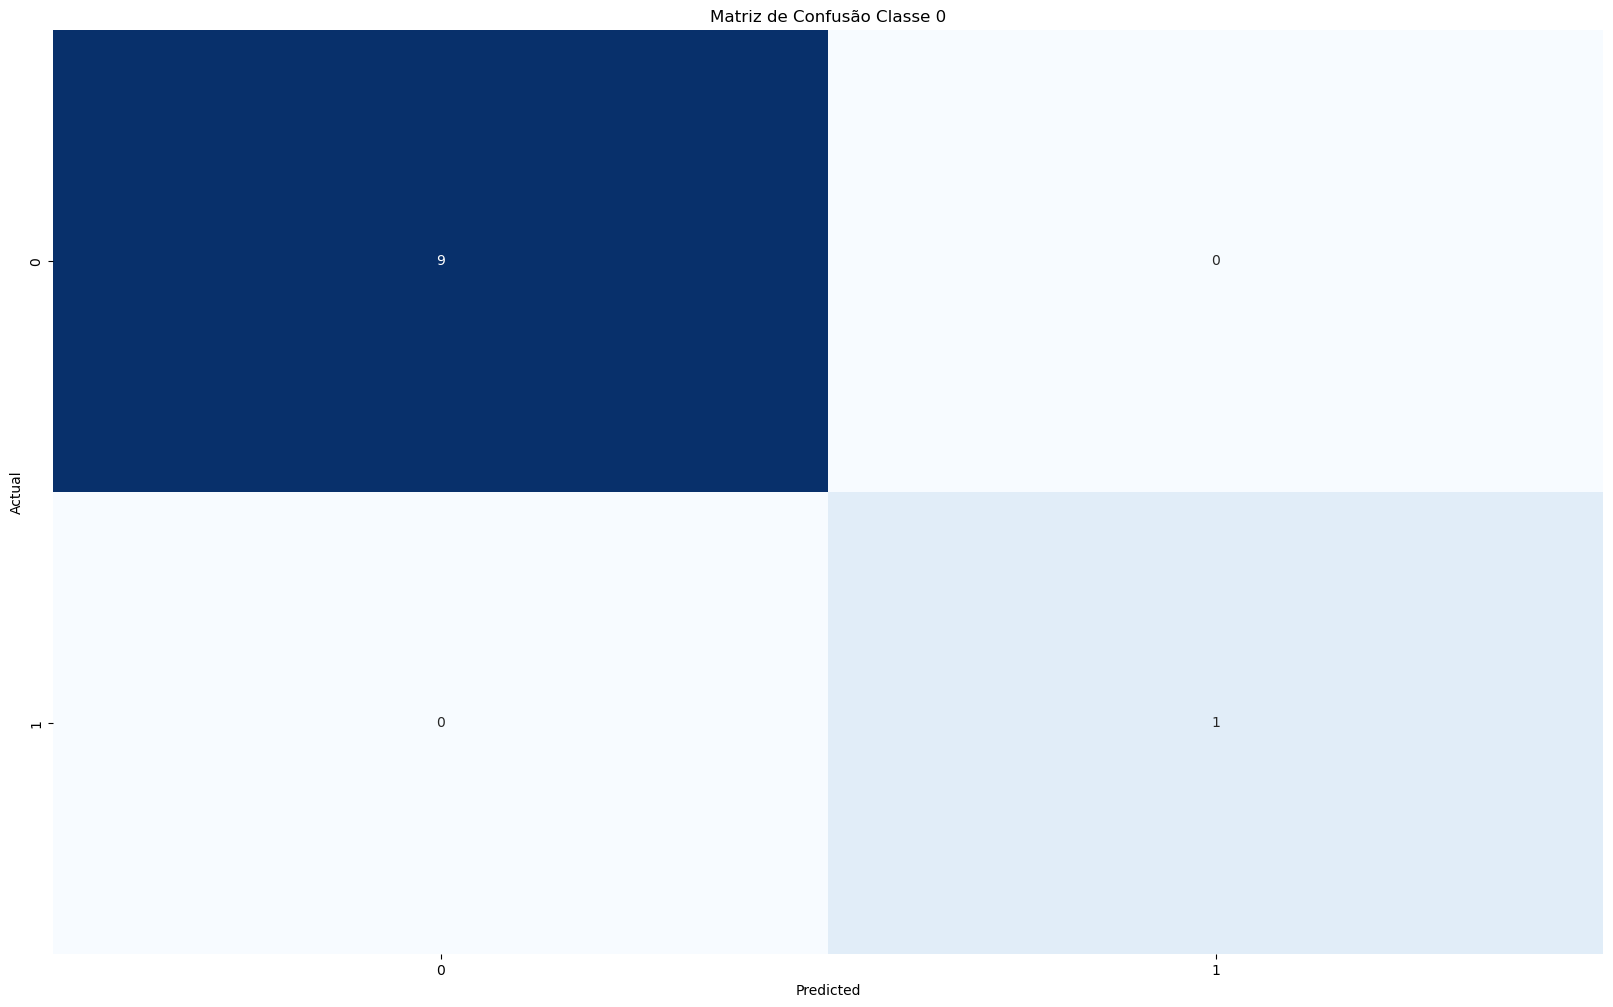

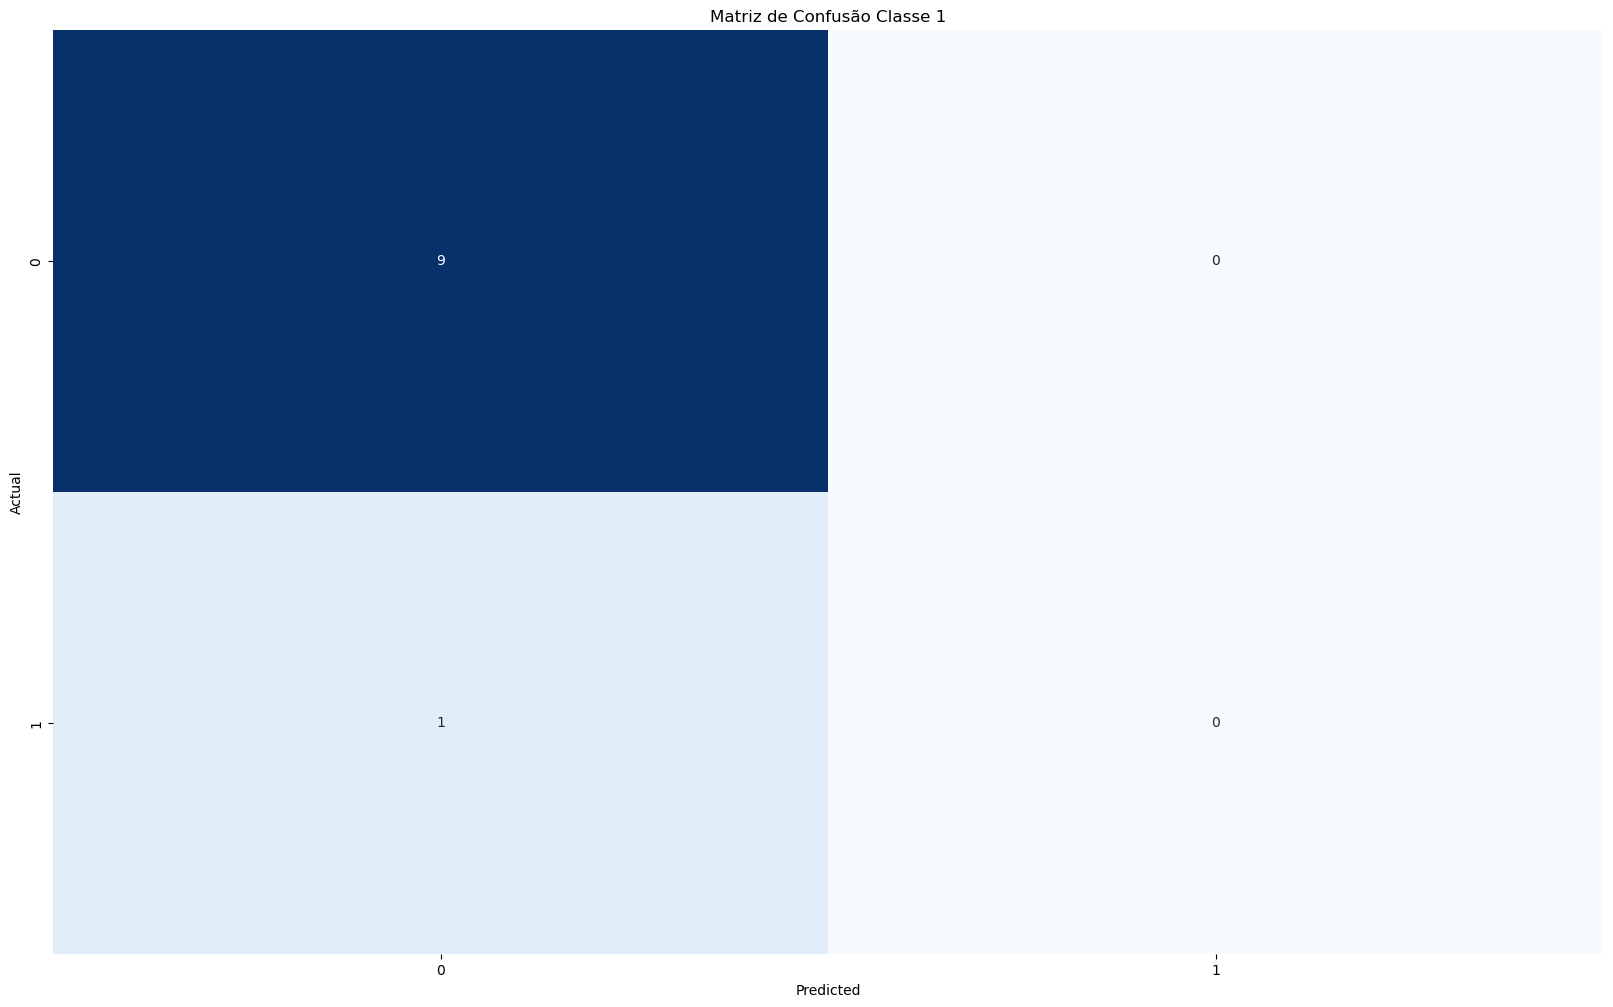

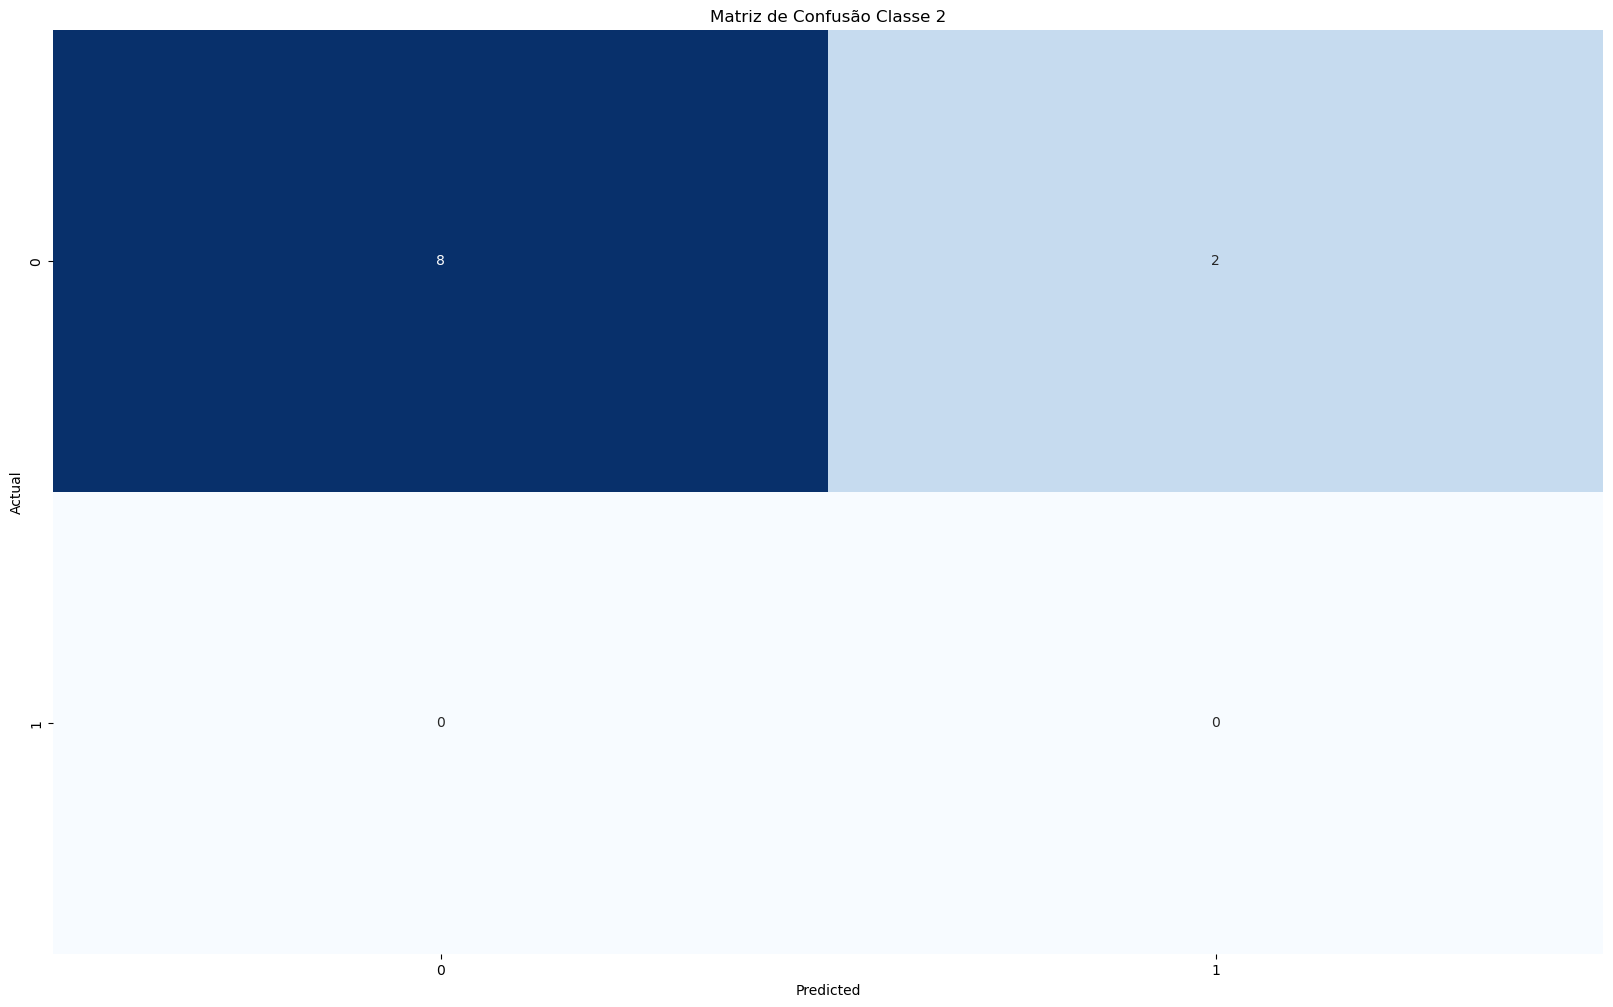

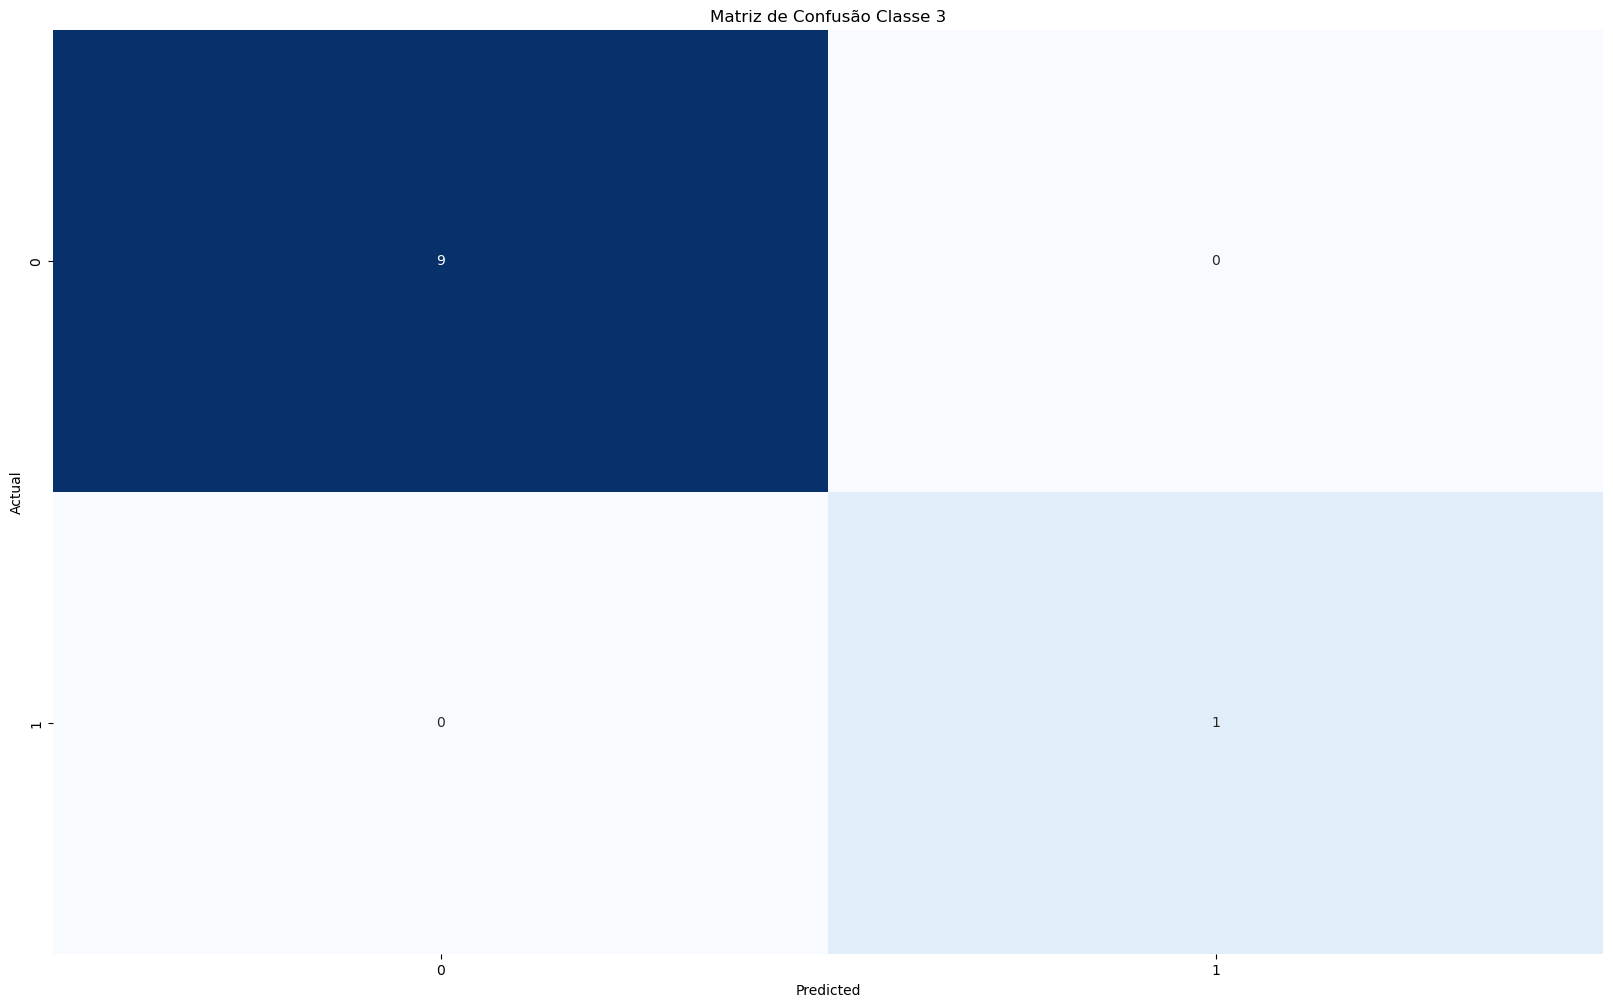

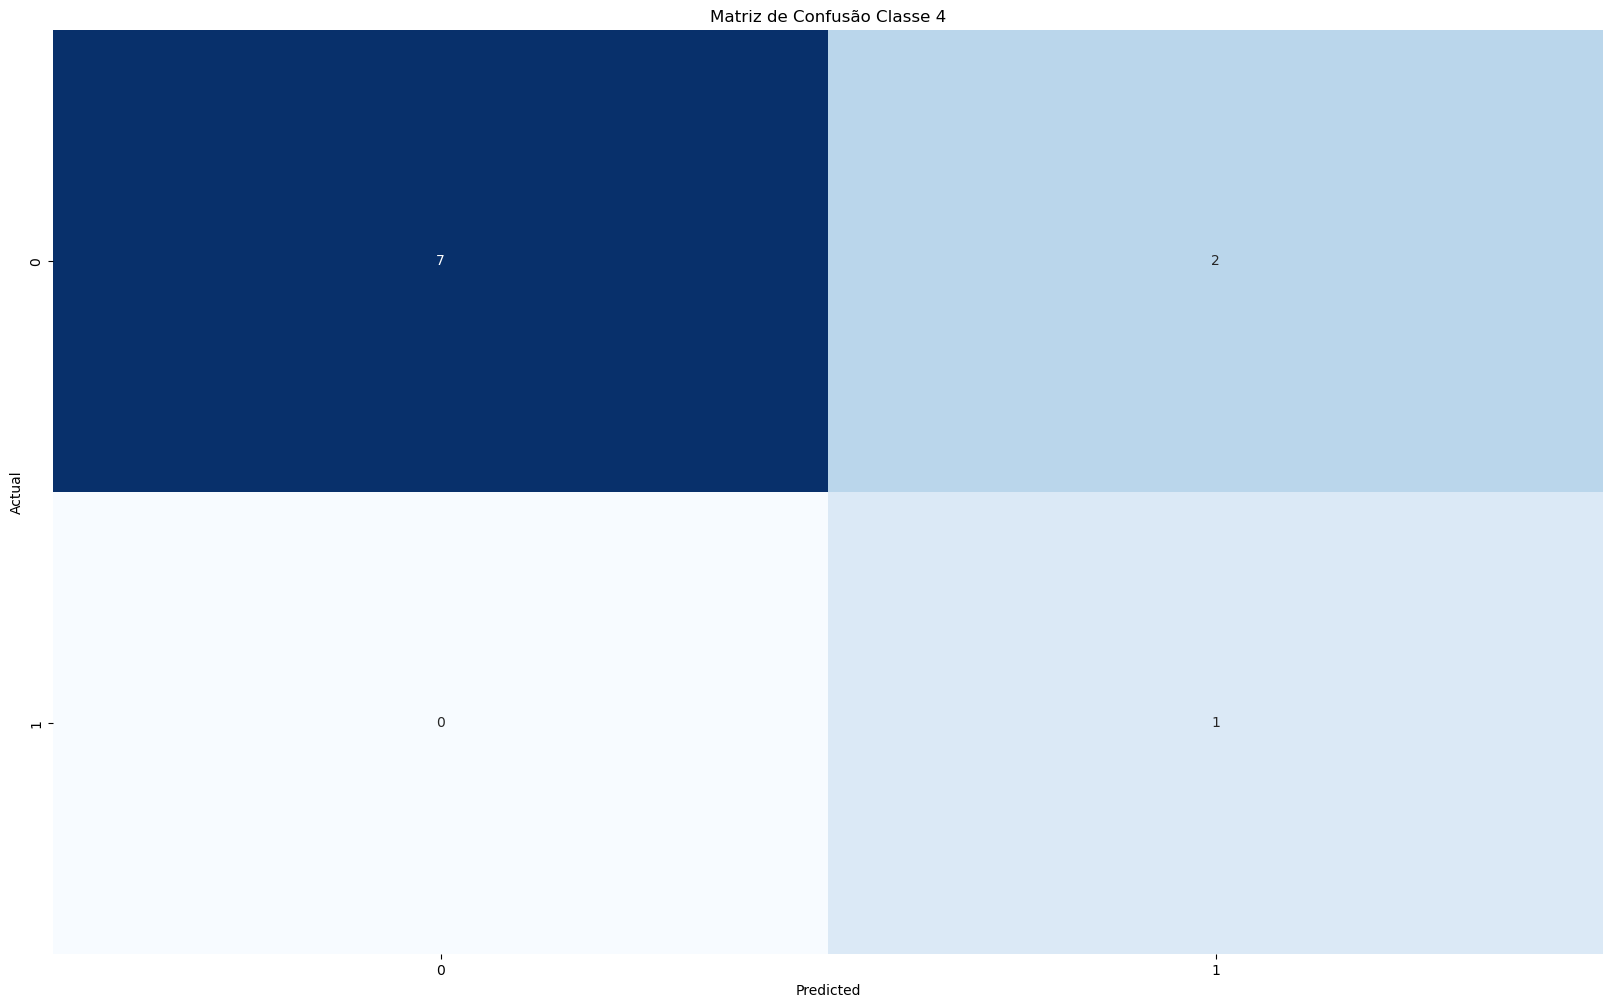

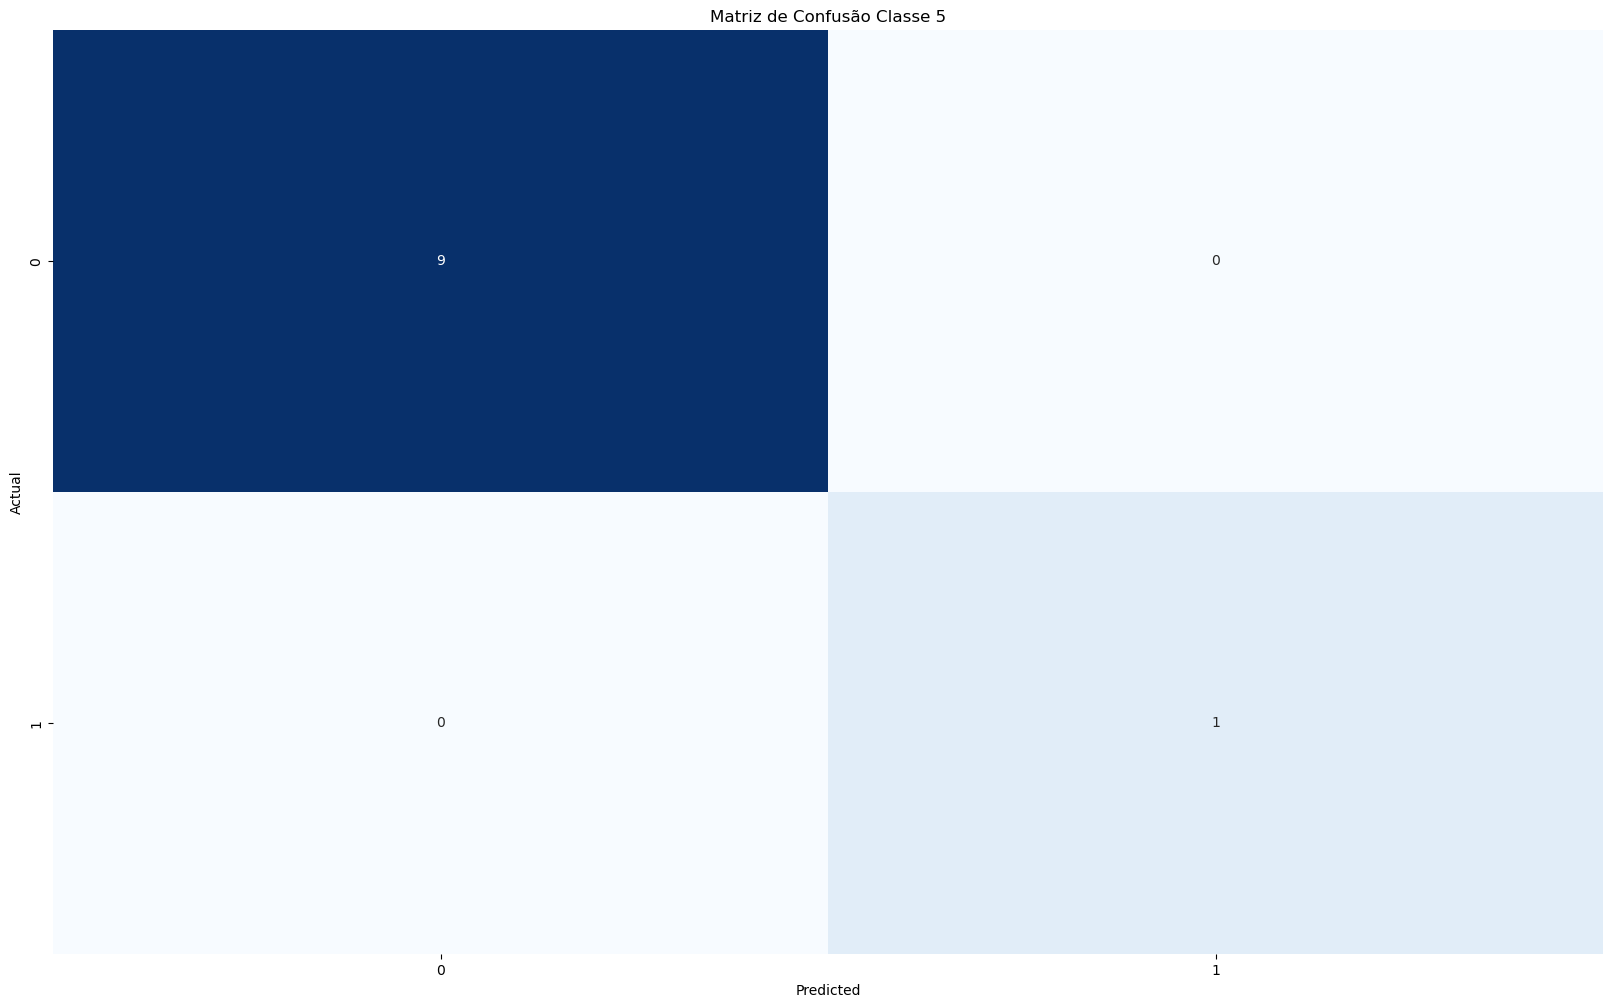

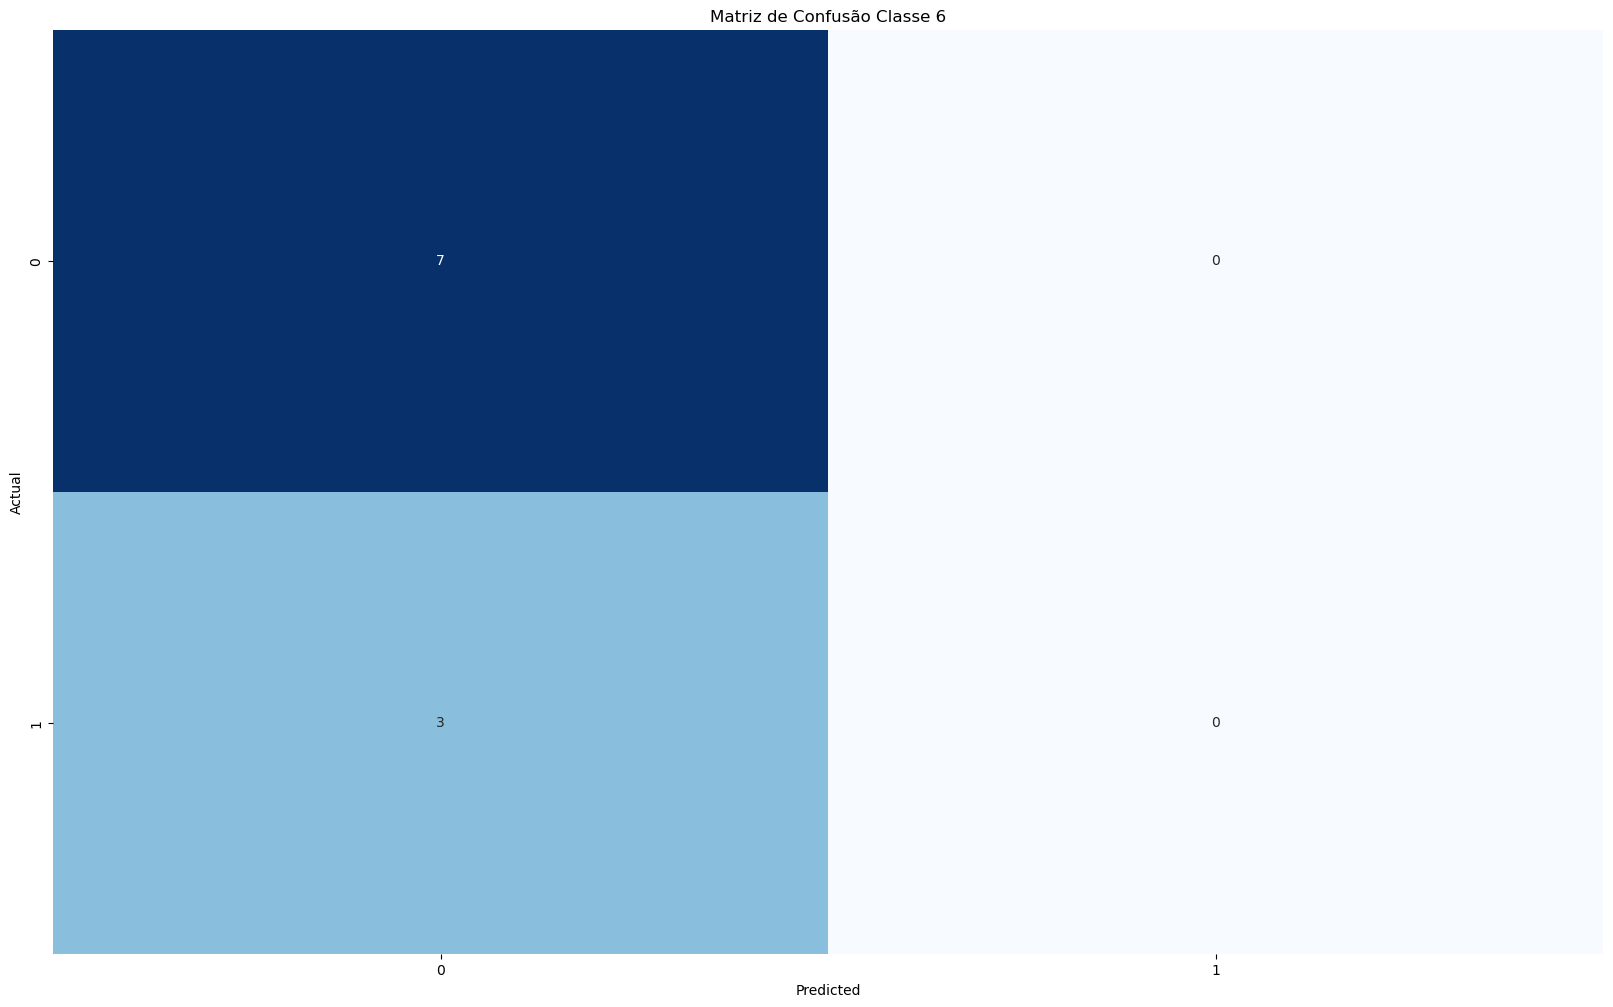

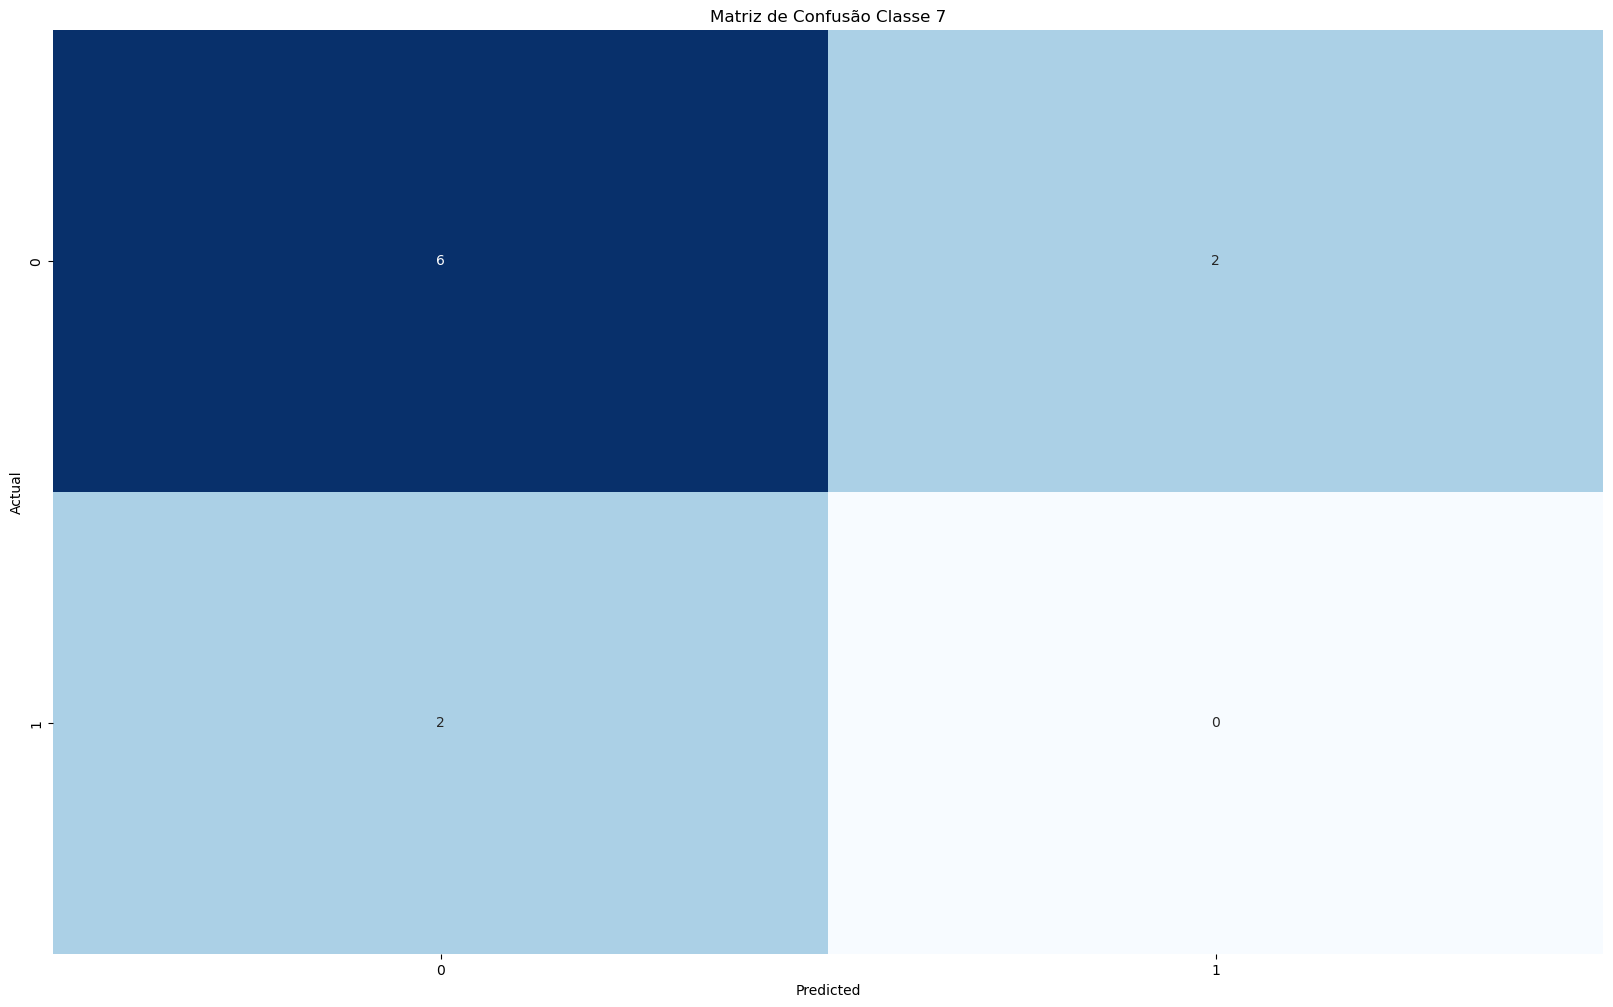

In [40]:
confusion_matrices = multilabel_confusion_matrix(ytrue, yhat)

# Plota um heatmap para cada matriz de confusão
for i, confusion_matrix in enumerate(confusion_matrices):
    plt.figure(figsize=(20, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão Classe {i}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()